# Data Dictionary


**trtbps - Resting Blood Pressure:**

This variable represents the patient's resting blood pressure measured in millimeters of mercury (mm Hg)

**chol - Cholesterol:**

Cholesterol level in milligrams per deciliter (mg/dl), obtained via a BMI sensor

**fbs - Fasting Blood Sugar:**

Indicates whether the patient's fasting blood sugar level exceeds 120 mg/dl
Value 1 indicates true (fasting blood sugar > 120 mg/dl), while 0 indicates false

**restecg - Resting Electrocardiographic Results:**

Values:

0: Normal
1: ST-T wave abnormality

Refers to an irregularity or deviation from the normal pattern observed in the ST segment between the S and T waves

2: Left ventricular hypertrophy

Characterized by the enlargement or thickening (hypertrophy) of the muscle wall of the left ventricle of the heart
We might find correlations to blood pressure since it often occurs as a response to chronic high blood pressure


**thalachh - Maximum Heart Rate Achieved:**

Maximum heart rate achieved during any stress test --> important indicator of cardiovascular health and fitness

**oldpeak - ST Depression Induced by Exercise Relative to Rest:**

Previous peak ST depression observed in the electrocardiogram (ECG) induced by exercise relative to rest
ST depression is measured in millimeters (mm)

**slp - Slope:**

Represents the slope of the peak exercise ST segment in the ECG
Different slope values indicate varying degrees of upsloping, flat, or downsloping ST segments

**caa - Number of Major Vessels:**

Indicates the number of major coronary vessels colored by fluoroscopy
This is indicative of the severity of coronary artery disease

*////This might be an important indicator and have a meaningful correlation to our target

**thall - Thalium Stress Test Result:**

Result of the thallium stress test, ranging from 0 to 3

**exng - Exercise Induced Angina:**

Indicates whether the patient experienced angina (chest pain) induced by exercise.
Value 1 denotes 'Yes' (angina induced by exercise), while 0 denotes 'No'.

**output - Target Variable:**

Target variable indicating the presence (1) or absence (0) of heart disease.







# Imports Needed For Program

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, f1_score, recall_score, roc_auc_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Understanding My Data

In [2]:
heart= pd.read_csv('./heart.csv')
heart

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [3]:
replace = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain',
    'trtbps': 'Resting_Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Ecg_Results',
    'thalachh': 'Maximum_Heart_Rate',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slp': 'Slope',
    'caa': 'Major_Vessels',
    'thall': 'Thallium_Rate',
    'output': 'Target'
}

In [4]:
for column in heart.columns:
    if column in replace:
        heart.rename(columns={column: replace[column]}, inplace=True)
heart.head()

Age  Sex  Chest_Pain  Resting_Pressure  Cholesterol  Fasting_Blood_Sugar  \
0   63    1           3               145          233                    1   
1   37    1           2               130          250                    0   
2   41    0           1               130          204                    0   
3   56    1           1               120          236                    0   
4   57    0           0               120          354                    0   

   Resting_Ecg_Results  Maximum_Heart_Rate  Exercise_Induced_Angina  Old_Peak  \
0                    0                 150                        0       2.3   
1                    1                 187                        0       3.5   
2                    0                 172                        0       1.4   
3                    1                 178                        0       0.8   
4                    1                 163                        1       0.6   

   Slope  Major_Vessels  Thallium_Rate  Target  
0      0              0              1       1  
1      0              0              2       1  
2      2              0              2       1  
3      2              0              2       1  
4      2              0              2       1

### Starting off by identifying these

A distribution of both categorical columns and continuous columns helps us gain an early idea of the importance of scaling in such a dataset.

**Categorical columns:**

Distribution plots --> count plots, bar plots, pie charts

Understanding the distribution of categorical columns is crucial for tasks like classification or understanding class imbalances. It helps us identify whether certain categories dominate the dataset or if there's a relatively even distribution among different classes.

Categorical variables are also usually encoded into numerical values before modeling (e.g., one-hot encoding, label encoding)

**Continuous Columns**

Have a much wider range of possible values

Visualization techniques such as histograms, kernel density estimation (KDE) plots, box plots, Scatterplots, or violin plots can be used

Understanding the distribution of continuous variables helps in identifying outliers and how skewed out model is skewed


In [ ]:
categorical_cols = ['Sex','Exercise_Induced_Angina','Major_Vessels','Chest_Pain','Fasting_Blood_Sugar','Resting_Ecg_Results','Slope','Thallium_Rate']
cont_cols = ["Age","Resting_Pressure","Cholesterol","Maximum_Heart_Rate","Old_Peak"]
target_col = ['Target']

print("The categorical columns (nominal or ordinal) are:", categorical_cols)
print("The continuous columns (numerical) are:", cont_cols)
print("The target column containing the outcome variable is:", target_col)

### Identifying Patterns

**Age**

Distribution appears to be relatively symmetric --> with the median age (50th percentile) at 55 years

**Sex**

The dataset includes both male and female individuals, with approximately 68.3% being male (based on the mean)

The sex variable is binary --> 0 represents female and 1 represents male

**Chest_Pain**

0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

Most feel a strong sense of pain

//////////////////*Note, this might be something we want to look at closer*//////////////////////////////////////////////

**Resting Blood Pressure**

The average resting blood pressure is 131.6 mmHg, with a standard deviation of around 17.5 mmHg

The distribution of resting blood pressure values seems to be within a normal range, with a minimum of 94 mmHg and a maximum of 200 mmHg.

**Cholesterol**

The average cholesterol level is around 246.3 mg/dl, with a standard deviation of approximately 51.8 mg/dl

Cholesterol levels vary widely among individuals, ranging from 126 mg/dl to 564 mg/dl

//////////////////*Note, this might be something we want to look at closer*//////////////////////////////////////////////

**Heart Rate**

The average maximum heart rate achieved during exercise is approximately 149.6 beats per minute (bpm) --> relatively "normal"

**Old Peak**

The mean ST depression value is 1.04 mm

The range of ST depression values varies from 0 mm to 6.2 mm

This variable represents the degree of abnormality in the ST segment of the electrocardiogram (ECG) induced by exercise compared to rest.

//////////////////*Note, this might be something we want to look at closer*//////////////////////////////////////////////


**Slope**

Ranges from 0 to 2

**Major Vessels**

The mean number of major vessels colored by fluoroscopy is close to 0.97, with a standard deviation of about 1.03

The number of major vessels ranges from 0 to 3, indicating the severity of coronary artery disease based on the number of major vessels affected


**Thallium Stress Test**

The mean thallium rate is approximately 2.31, with a standard deviation of around 0.61 --> ranges from 0-3

Somewhat abnormal and variant

//////////////////*Note, this might be something we want to look at closer*//////////////////////////////////////////////


**Target**

What we're trying to predict (if using supervised learning model) --> 0 represents the absence and 1 represents the presence of heart disease

In [30]:
heart.describe()

Age         Sex  Chest_Pain  Resting_Pressure  Cholesterol  \
count  303.000000  303.000000  303.000000        303.000000   303.000000   
mean    54.366337    0.683168    0.966997        131.623762   246.264026   
std      9.082101    0.466011    1.032052         17.538143    51.830751   
min     29.000000    0.000000    0.000000         94.000000   126.000000   
25%     47.500000    0.000000    0.000000        120.000000   211.000000   
50%     55.000000    1.000000    1.000000        130.000000   240.000000   
75%     61.000000    1.000000    2.000000        140.000000   274.500000   
max     77.000000    1.000000    3.000000        200.000000   564.000000   

       Fasting_Blood_Sugar  Resting_Ecg_Results  Maximum_Heart_Rate  \
count           303.000000           303.000000          303.000000   
mean              0.148515             0.528053          149.646865   
std               0.356198             0.525860           22.905161   
min               0.000000             0.000000           71.000000   
25%               0.000000             0.000000          133.500000   
50%               0.000000             1.000000          153.000000   
75%               0.000000             1.000000          166.000000   
max               1.000000             2.000000          202.000000   

       Exercise_Induced_Angina    Old_Peak       Slope  Major_Vessels  \
count               303.000000  303.000000  303.000000     303.000000   
mean                  0.326733    1.039604    1.399340       0.729373   
std                   0.469794    1.161075    0.616226       1.022606   
min                   0.000000    0.000000    0.000000       0.000000   
25%                   0.000000    0.000000    1.000000       0.000000   
50%                   0.000000    0.800000    1.000000       0.000000   
75%                   1.000000    1.600000    2.000000       1.000000   
max                   1.000000    6.200000    2.000000       4.000000   

       Thallium_Rate      Target  
count     303.000000  303.000000  
mean        2.313531    0.544554  
std         0.612277    0.498835  
min         0.000000    0.000000  
25%         2.000000    0.000000  
50%         2.000000    1.000000  
75%         3.000000    1.000000  
max         3.000000    1.000000

### Cleaning the Data

In [ ]:
print("Shape of Data: ", heart.shape)
heart.info()

In [28]:
heart.isnull().sum() #Already cleaned dataset

Age                        0
Sex                        0
Chest_Pain                 0
Resting_Pressure           0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_Ecg_Results        0
Maximum_Heart_Rate         0
Exercise_Induced_Angina    0
Old_Peak                   0
Slope                      0
Major_Vessels              0
Thallium_Rate              0
Target                     0
dtype: int64

In [193]:
heart.duplicated().sum()

1

In [5]:
heart.drop_duplicates(inplace=True)
heart.shape

(302, 14)

In [195]:
dict = {}
for i in list(heart.columns):
    dict[i] = heart[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
Age                                41
Sex                                 2
Chest_Pain                          4
Resting_Pressure                   49
Cholesterol                       152
Fasting_Blood_Sugar                 2
Resting_Ecg_Results                 3
Maximum_Heart_Rate                 91
Exercise_Induced_Angina             2
Old_Peak                           40
Slope                               3
Major_Vessels                       5
Thallium_Rate                       4
Target                              2

In [128]:
#Checking for abnormalities in data

cont_cols = ["Age", "Resting_Pressure", "Cholesterol", "Maximum_Heart_Rate", "Old_Peak"]

for col in cont_cols:
    if 0 in heart[col].values:
        print(f"0 exists in column {col}")
    else:
        print(f"No 0 values found in column {col}")

No 0 values found in column Age
No 0 values found in column Resting_Pressure
No 0 values found in column Cholesterol
No 0 values found in column Maximum_Heart_Rate
0 exists in column Old_Peak


## Understanding Data Distribution

In [10]:
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Age', '<i>Resting Pressure', '<i>Cholesterol', '<i>Maximum Heart Rate'))
fig.add_trace(go.Histogram(x=heart['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Histogram(x=heart['Resting_Pressure'],name='Resting_Pressure'),row=1,col=2)
fig.add_trace(go.Histogram(x=heart['Cholesterol'],name='Cholesterol'),row=2,col=1)
fig.add_trace(go.Histogram(x=heart['Maximum_Heart_Rate'],name='Maximum_Heart_Rate'),row=2,col=2)

fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(title_x=0.5, font_family='Courier New')


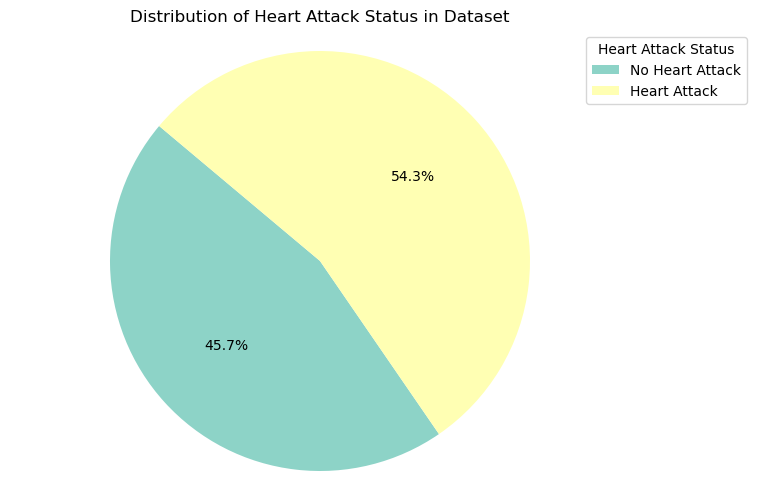

In [91]:
#Nicely distributed data

# Calculate the counts of each category in the target variable
target_counts = heart["Target"].value_counts().sort_index(ascending=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors  # You can choose a colormap of your preference

# Plot the pie chart
plt.pie(target_counts, colors=colors, startangle=140, autopct='%1.1f%%')

# Define labels for each category
labels = ['No Heart Attack', 'Heart Attack']

# Create a legend with labels
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
legend = plt.legend(labels, title="Heart Attack Status", loc="best", bbox_to_anchor=(1, 1))
legend.set_bbox_to_anchor((1.2, 1))  # Adjust the position of the legend

# Set a title
plt.title("Distribution of Heart Attack Status in Dataset")

# Show the plot
plt.show()

In [23]:
heart['Age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

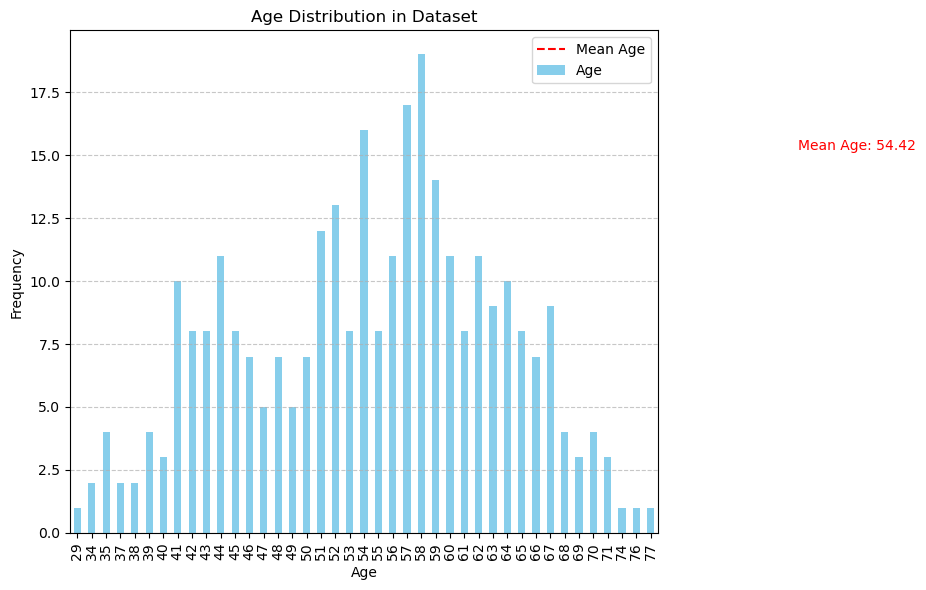

In [132]:
# Count the occurrences of each age and sort them
age_counts = heart["Age"].value_counts().sort_index(ascending=True)

# Calculate the mean age
mean_age = heart["Age"].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the bar chart
age_counts.plot(kind='bar', color='skyblue')

# Add a vertical line for the mean age
plt.axvline(x=mean_age, color='red', linestyle='--', label='Mean Age')

# Add text annotation for mean age
plt.text(mean_age, max(age_counts) * 0.8, f'Mean Age: {mean_age:.2f}', color='red', ha='center')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Dataset')

# Add legend
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#even spread of data


### Possible Limitation in the Data: 

#Very uneven spread/distribution (clearly our model has bias to begin with, in a professional environment, one would want to gather more data samples to help prevent introducing bias in our ML model) 

Heart disease is the leading cause of death for both men and women. Heart attacks do not discriminate — women are just as likely to have a heart attack as men are. But women are more likely than men to die from one. Studies show it often comes down to recognizing symptoms of a heart attack — or not.

(https://www.templehealth.org/about/blog/heart-attack-symptoms-men-women-differences#:~:text=Heart%20disease%20is%20the%20leading,a%20heart%20attack%20%E2%80%94%20or%20not.)


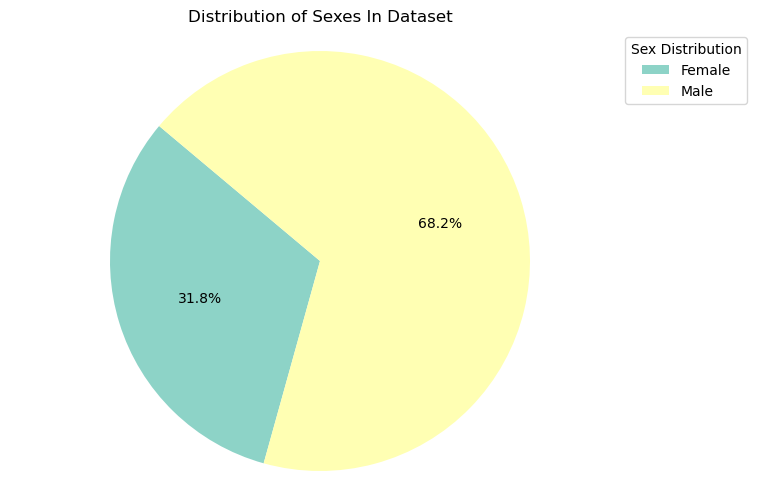

In [134]:
sex_counts = heart["Sex"].value_counts().sort_index(ascending=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors  # You can choose a colormap of your preference

# Plot the pie chart
plt.pie(sex_counts, colors=colors, startangle=140, autopct='%1.1f%%')

# Define labels for each category
labels = ['Female', 'Male']

# Create a legend with labels
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
legend = plt.legend(labels, title="Sex Distribution", loc="best", bbox_to_anchor=(1, 1))
legend.set_bbox_to_anchor((1.2, 1))  # Adjust the position of the legend

# Set a title
plt.title("Distribution of Sexes In Dataset")

# Show the plot
plt.show()


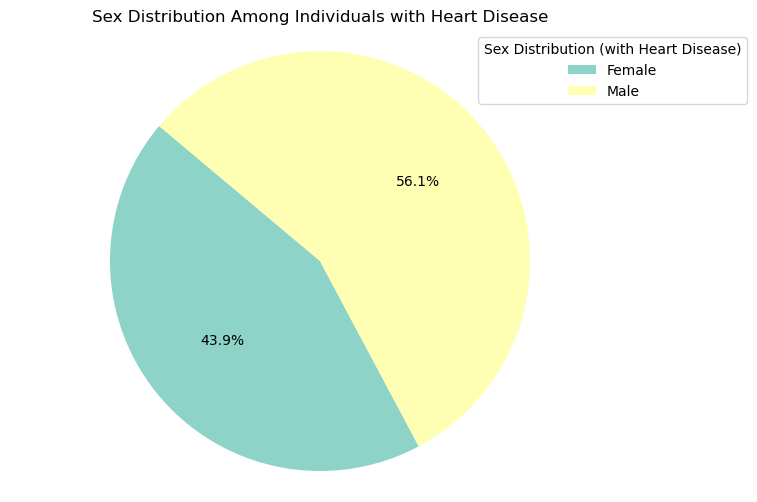

In [135]:
# Filter the dataset for rows where the target column is 1
heart_with_disease = heart[heart['Target'] == 1]

# Get the sex distribution for individuals with heart disease
sex_counts_with_disease = heart_with_disease['Sex'].value_counts().sort_index(ascending=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors

# Plot the pie chart
plt.pie(sex_counts_with_disease, colors=colors, startangle=140, autopct='%1.1f%%')

# Define labels for each category
labels = ['Female', 'Male']

# Create a legend with labels
plt.axis('equal')
legend = plt.legend(labels, title="Sex Distribution (with Heart Disease)", loc="best", bbox_to_anchor=(1, 1))
legend.set_bbox_to_anchor((1.2, 1))

# Set a title
plt.title("Sex Distribution Among Individuals with Heart Disease")

# Show the plot
plt.show()


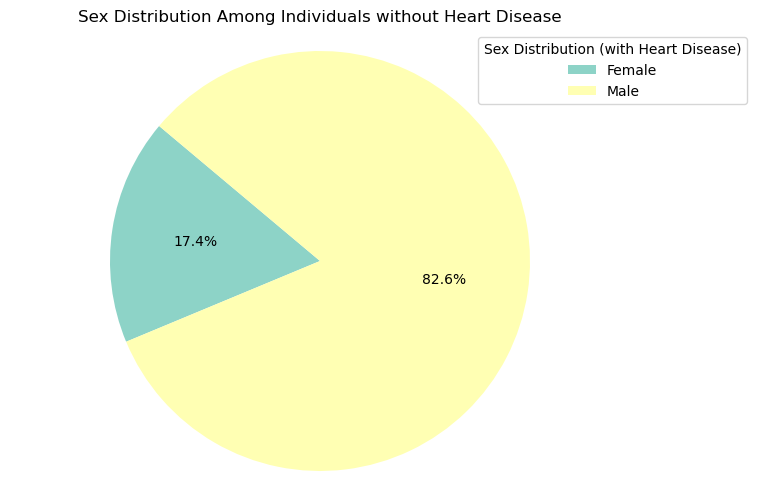

In [136]:
# Filter the dataset for rows where the target column is 1
heart_with_disease = heart[heart['Target'] == 0]

# Get the sex distribution for individuals with heart disease
sex_counts_with_disease = heart_with_disease['Sex'].value_counts().sort_index(ascending=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors

# Plot the pie chart
plt.pie(sex_counts_with_disease, colors=colors, startangle=140, autopct='%1.1f%%')

# Define labels for each category
labels = ['Female', 'Male']

# Create a legend with labels
plt.axis('equal')
legend = plt.legend(labels, title="Sex Distribution (with Heart Disease)", loc="best", bbox_to_anchor=(1, 1))
legend.set_bbox_to_anchor((1.2, 1))

# Set a title
plt.title("Sex Distribution Among Individuals without Heart Disease")

# Show the plot
plt.show()


In [156]:
# Filter data for individuals who had a heart attack (where 'Target' is 1)
heart_attack_data = heart[heart['Target'] == 1]

# Calculate counts of males and females having heart attacks
male_count = (heart_attack_data['Sex'] == 0).sum()
female_count = (heart_attack_data['Sex'] == 1).sum()

# Print the counts
print("Number of males having heart attacks:", male_count)
print("Number of females having heart attacks:", female_count)

Number of males having heart attacks: 72
Number of females having heart attacks: 92


# Data Visualizations

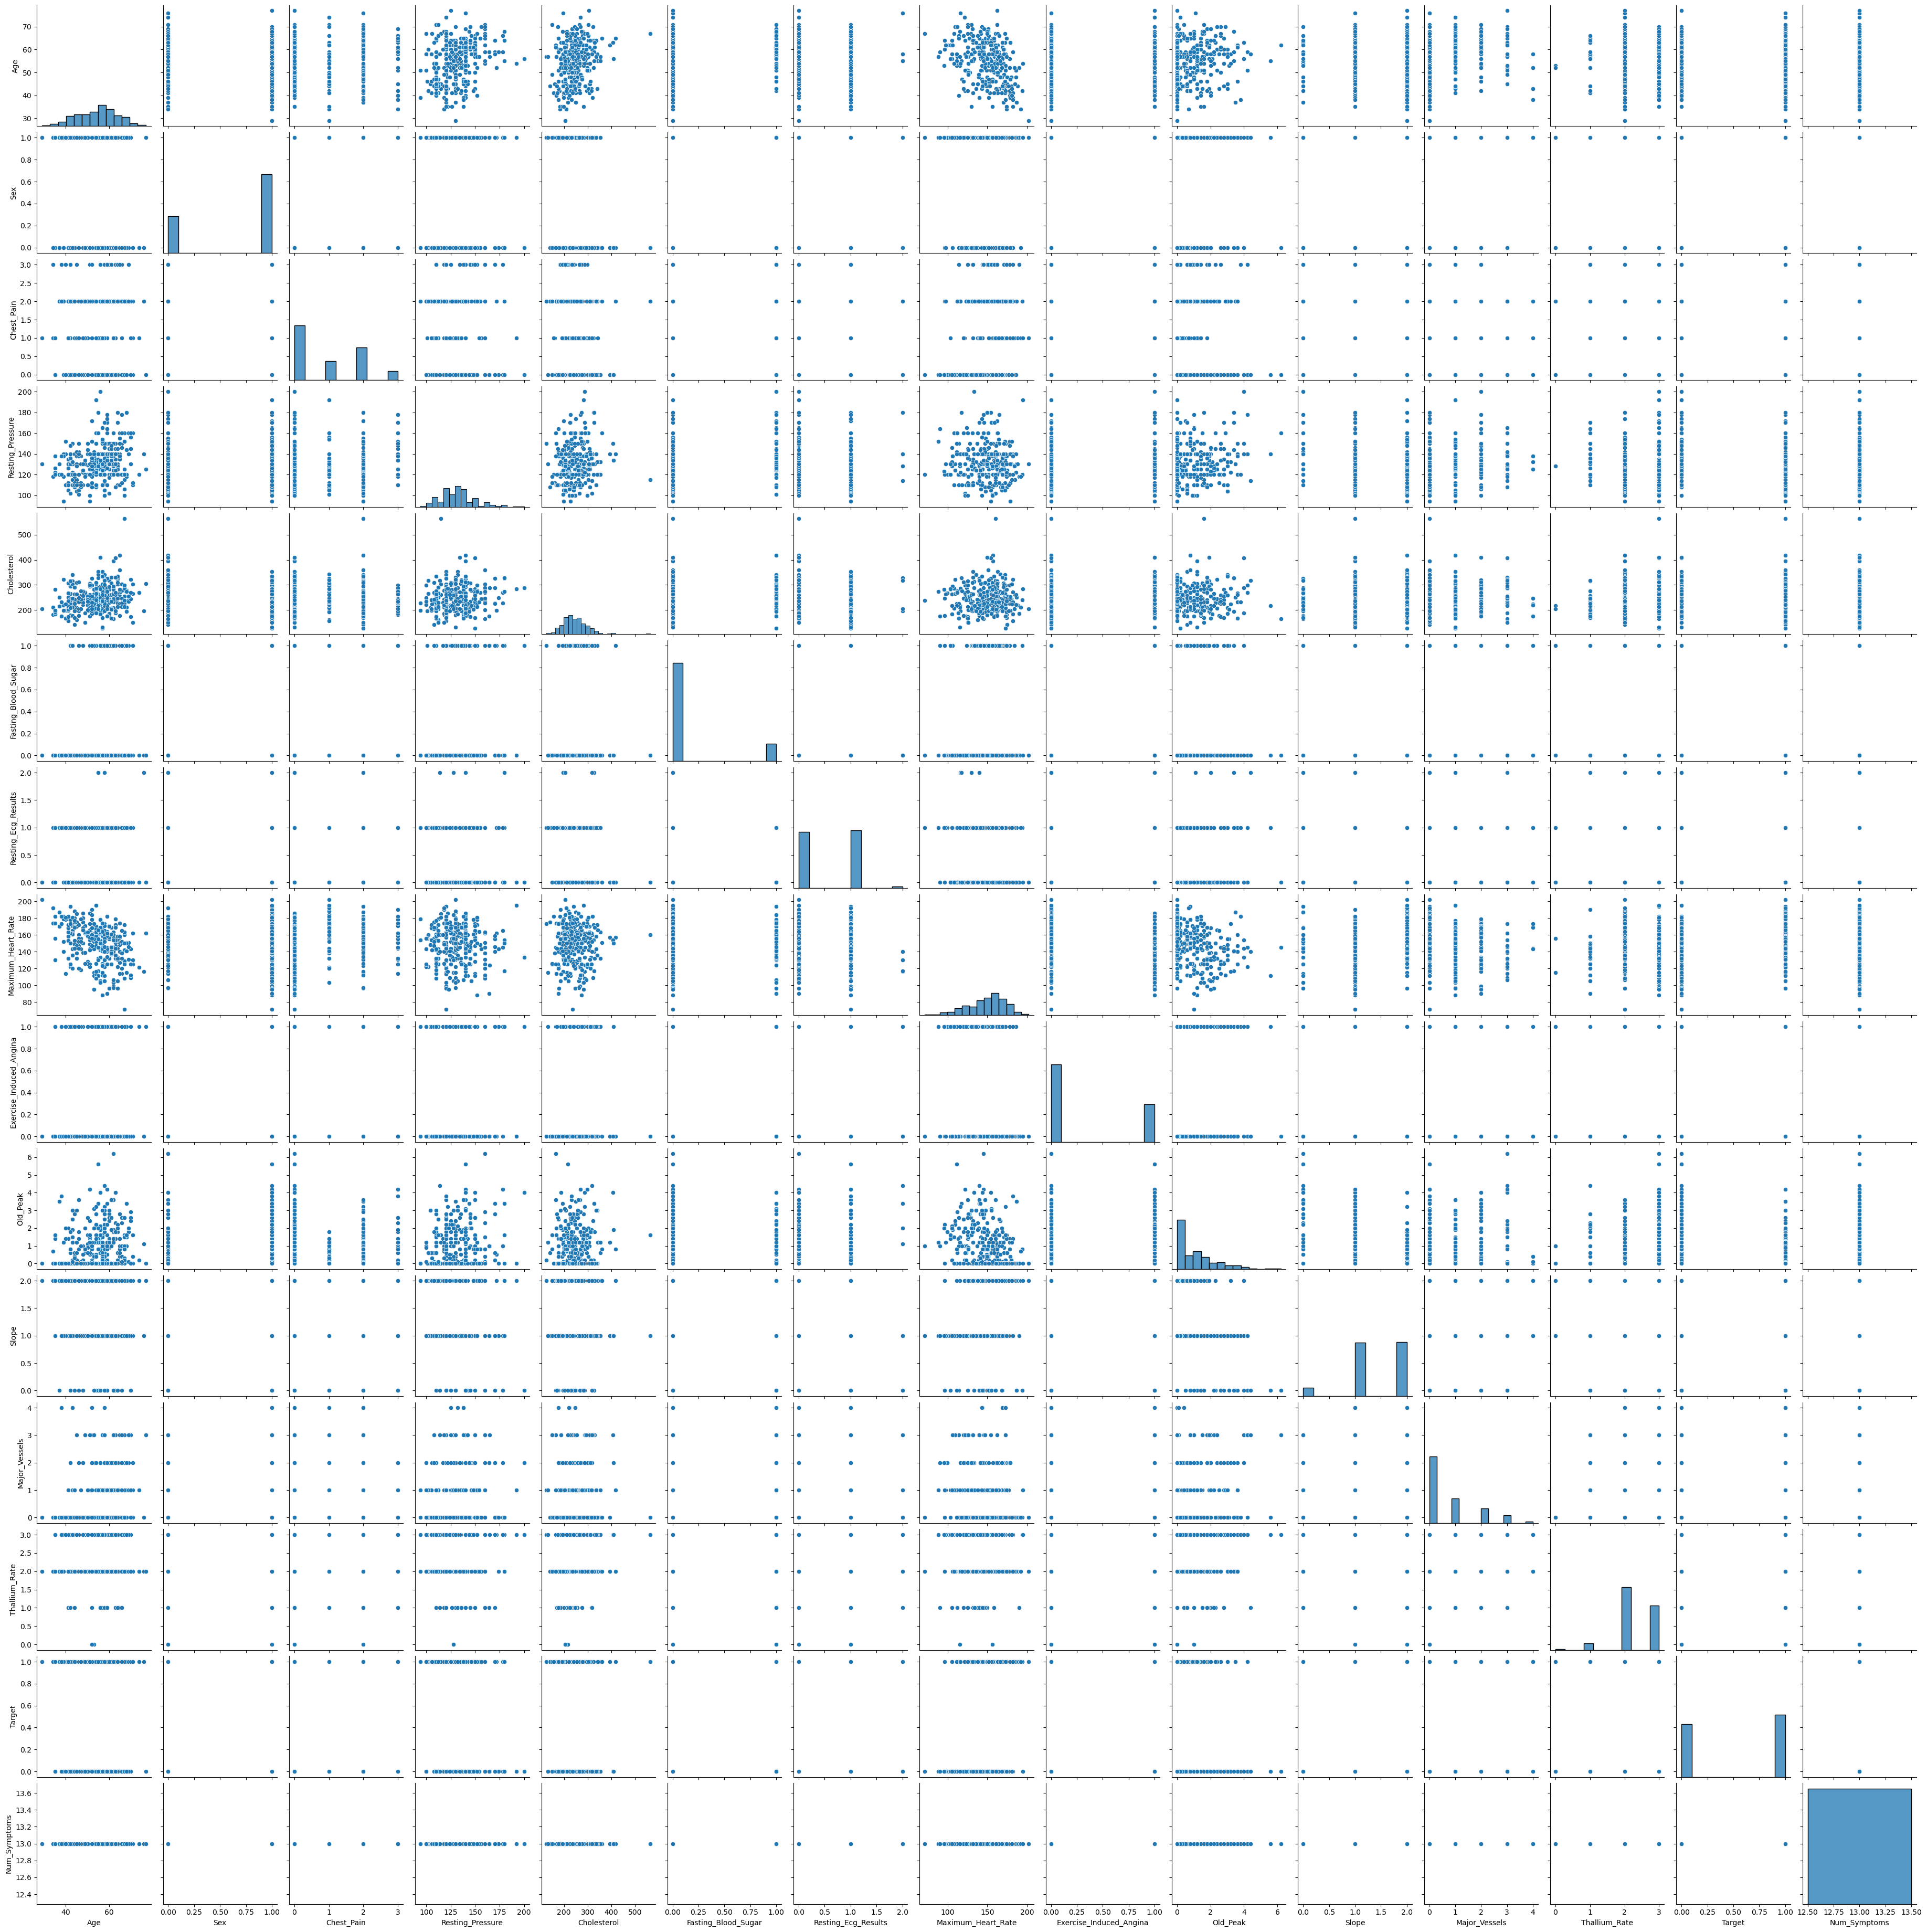

In [107]:
sns.pairplot(heart)
plt.show()

### Zooming In

We're looking at the data points that we had identified later

**Investigate: Old Peak (definitely seems to have discernable difference in the data, might be an important feature**

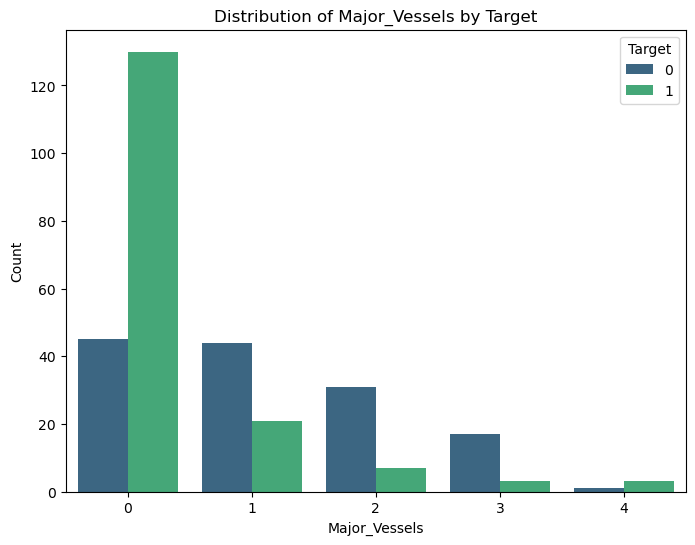

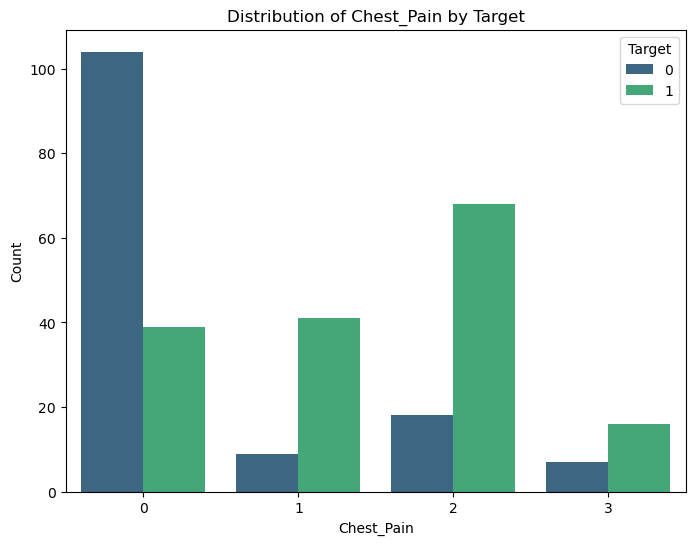

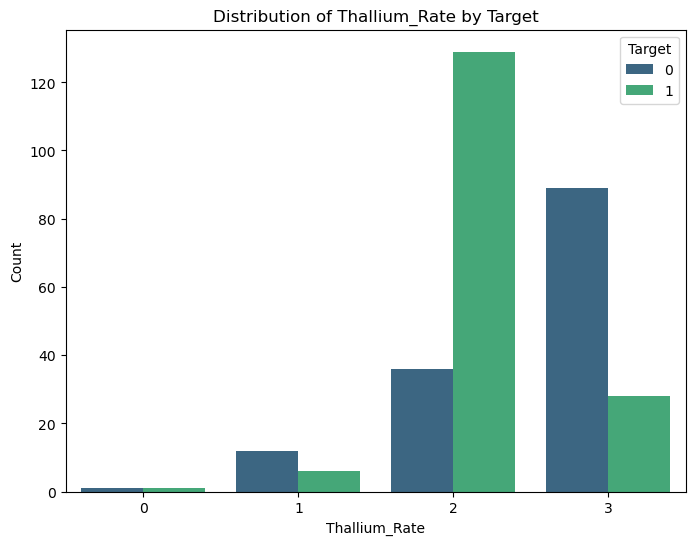

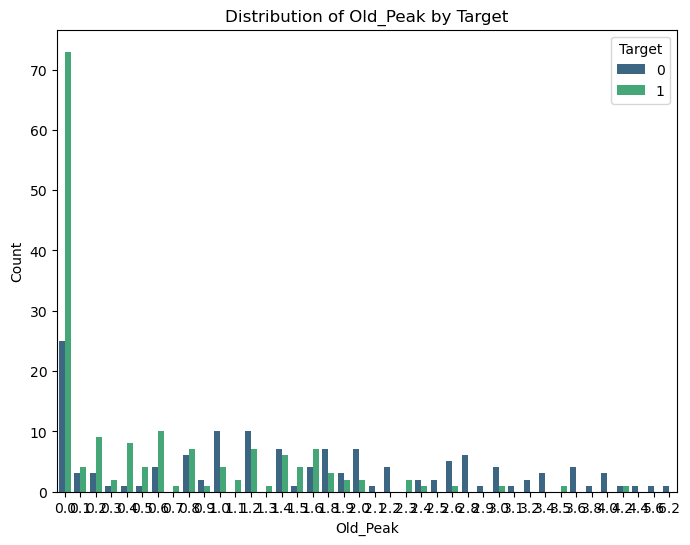

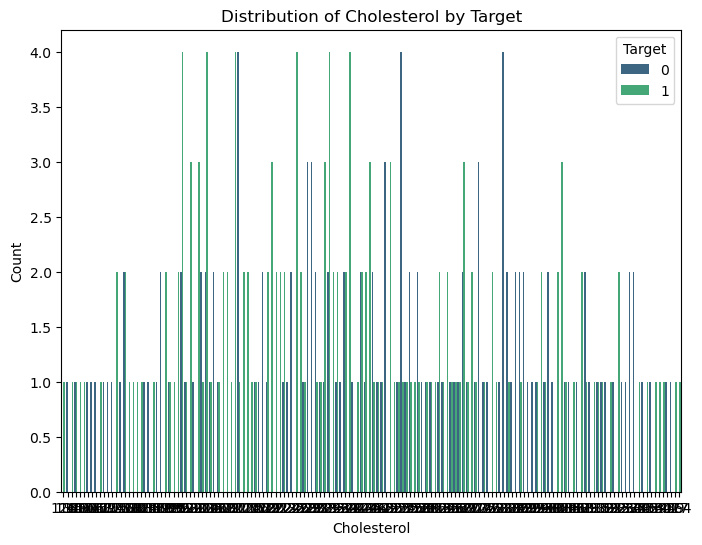

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


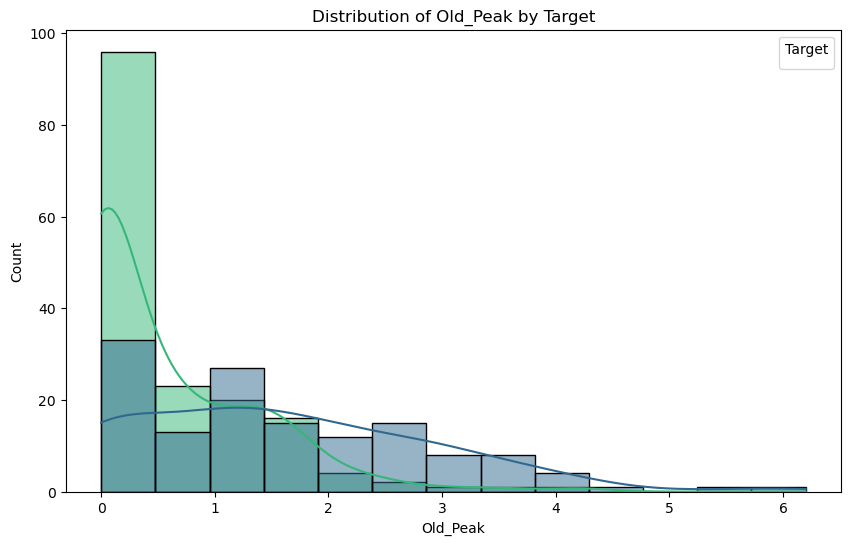

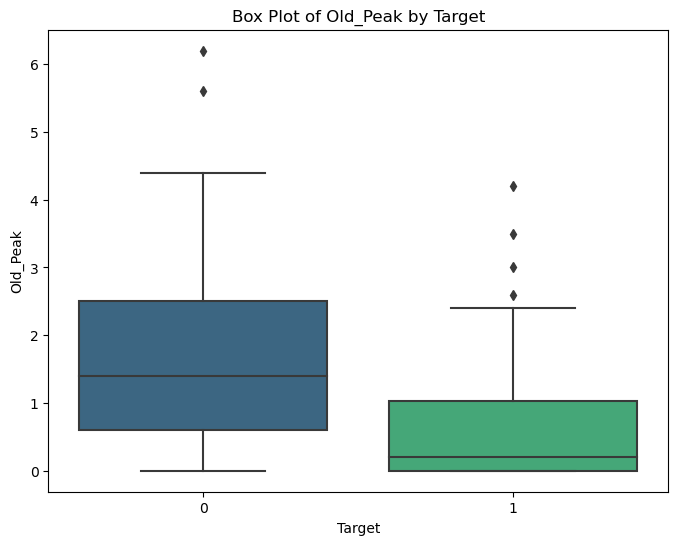

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


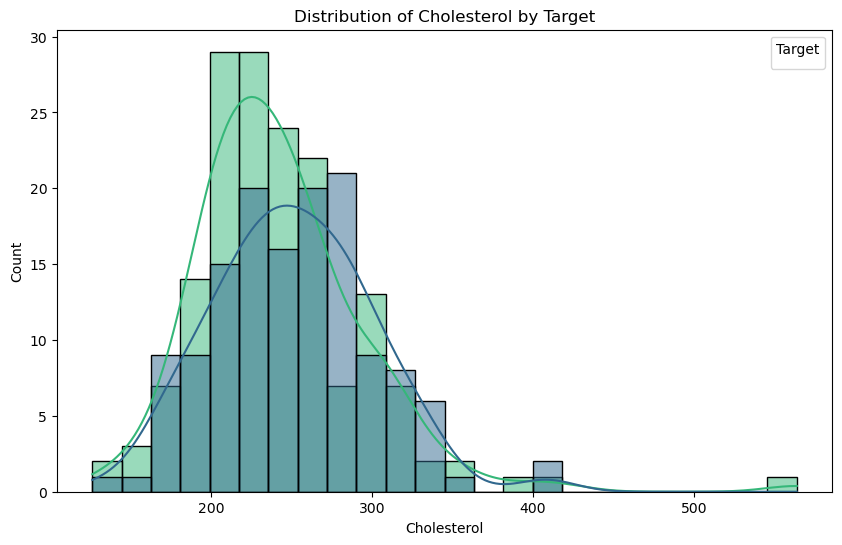

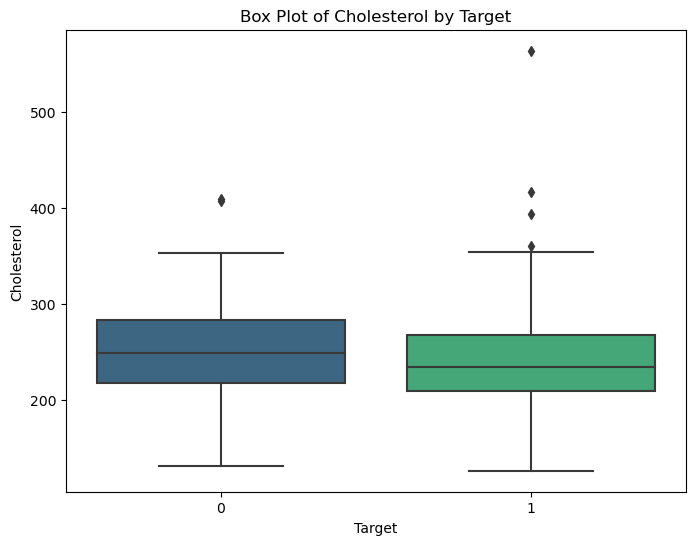

In [131]:
columns_of_interest = ['Major_Vessels', 'Chest_Pain', 'Thallium_Rate', 'Old_Peak', 'Cholesterol']

# Categorical Columns
for col in columns_of_interest:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart, x=col, hue='Target', palette='viridis')
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.show()

# Continuous Columns
cont_cols = ["Old_Peak", "Cholesterol"]
for col in cont_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=heart, x=col, hue='Target', palette='viridis', kde=True)
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=heart, x='Target', y=col, palette='viridis')
    plt.title(f'Box Plot of {col} by Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()


# Looking At Other Data Points

**Based on the bar plot of Exercise Induced Angina and Slope --> that seems might have high feature correlation (we might want to look into that a bit more)

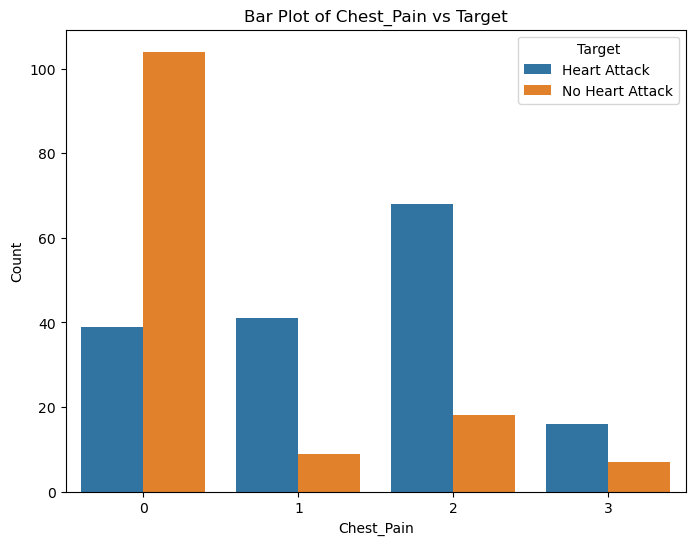

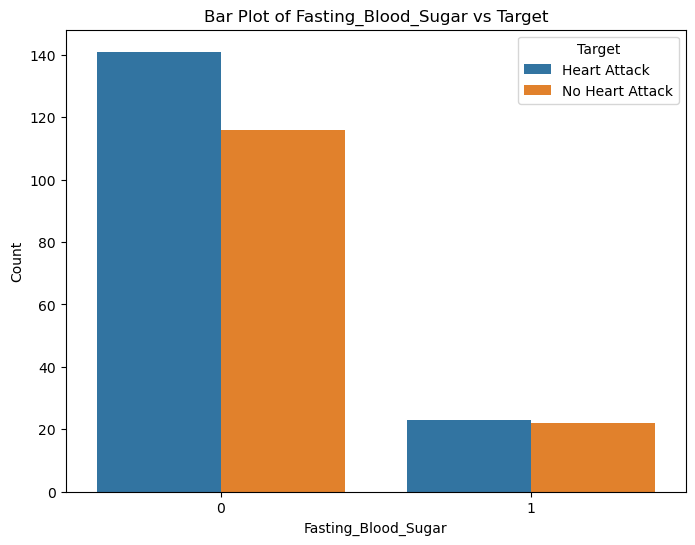

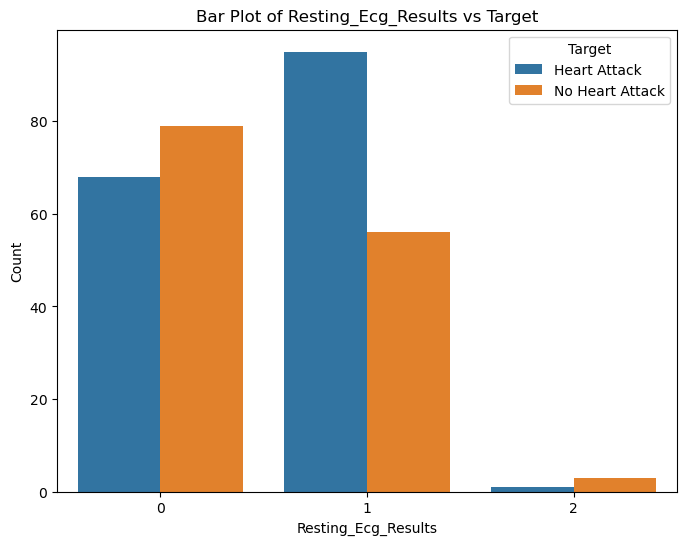

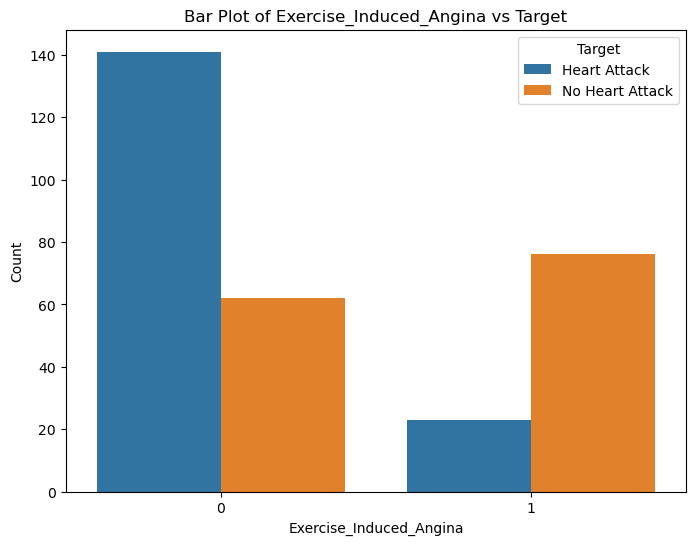

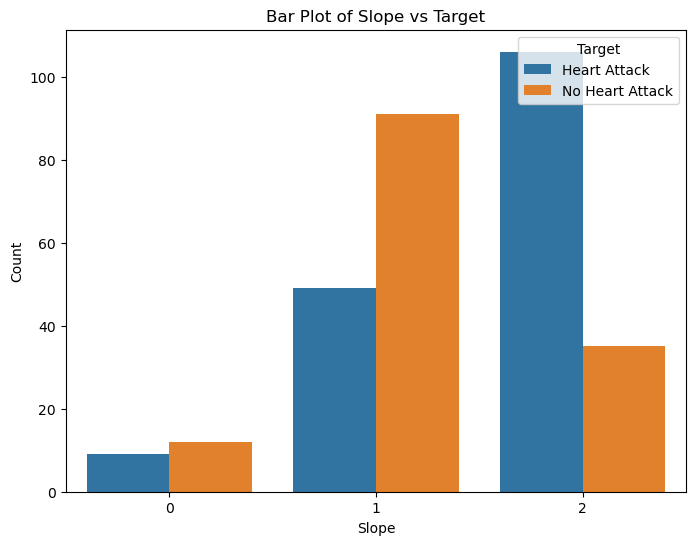

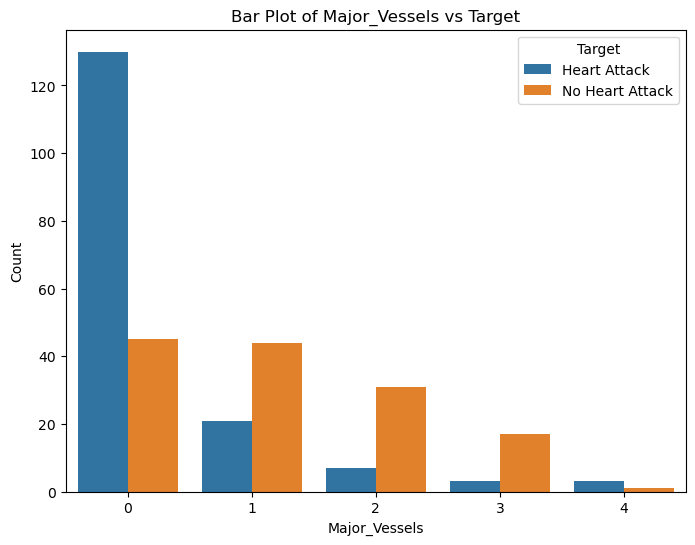

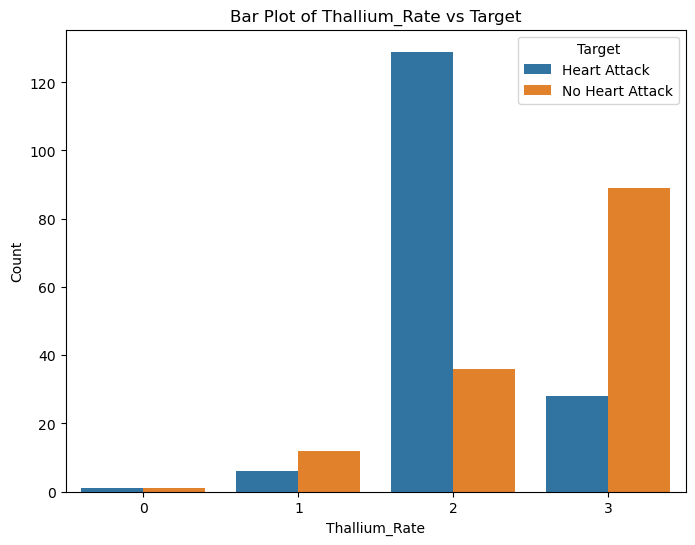

In [137]:
# Map target values to meaningful labels
heart['Target_Label'] = heart['Target'].map({0: 'No Heart Attack', 1: 'Heart Attack'})

# Bar plot for categorical variables
categorical_vars = ['Chest_Pain', 'Fasting_Blood_Sugar', 'Resting_Ecg_Results', 'Exercise_Induced_Angina', 'Slope', 'Major_Vessels', 'Thallium_Rate']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='Target_Label', data=heart)
    plt.title(f'Bar Plot of {var} vs Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.show()

# Remove the additional label column to prevent duplication
heart.drop('Target_Label', axis=1, inplace=True)


#### Analysis

There seems to be a even distribution but note the correlation of high slope and low exercise reduced angina

This likely shows individuals who don't have heart disease since individuals with high slope values may have better cardiovascular fitness or resilience, allowing them to tolerate higher levels of physical exertion without experiencing angina symptoms

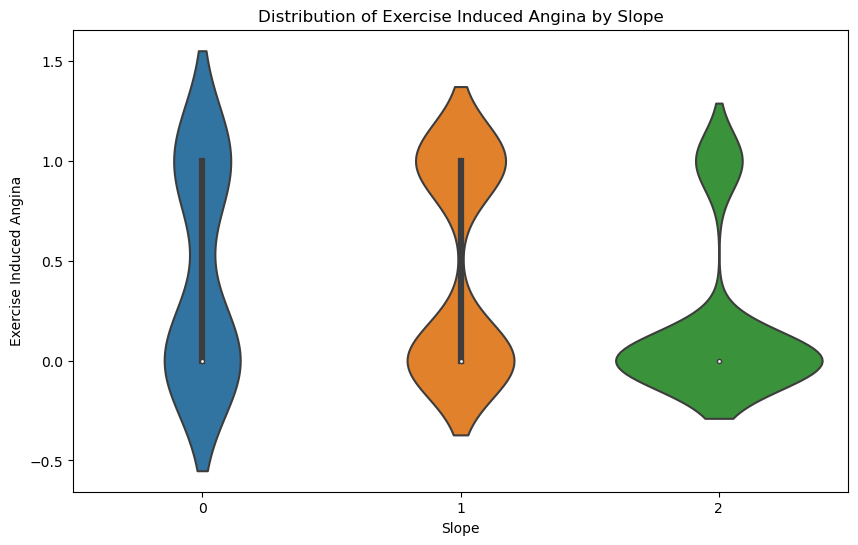

In [139]:
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x="Slope", y="Exercise_Induced_Angina", data=heart)

# Set the title and labels
plt.title("Distribution of Exercise Induced Angina by Slope")
plt.xlabel("Slope")
plt.ylabel("Exercise Induced Angina")

# Show the plot
plt.show()

#### Heart Rate

Initially nothing seems abnormal about this since the normal anormal resting heart rate for adults ranges from 60 to 100 beats per minute. However, looking closer, we find individuals that have never had a heart attack and with low heart rates but incredibly high blood pressure and high cholesterol

**John Hopkins Medical**
Here are the ranges for total cholesterol in adults: Normal: Less than 200 mg/dL. Borderline high: 200 to 239 mg/dL. High: At or above 240 mg/dL.

**Better Health Channel**

Blood Pressure ranges:

Optimal: Less than 120
Normal: 120 to 129
High-normal: 130 to 139
High: Greater than 140

**Why It Matters**

"High blood pressure and a low pulse rate is a rare occurrence. People are more likely to have high blood pressure alone unless they take medications that may affect their pulse rate. Rarely, an increase in intracranial pressure can induce the Cushing reflex with a low pulse rate and high blood pressure. (https://www.medicalnewstoday.com/articles/326368#:~:text=underlying%20heart%20problem.-,Summary,rate%20and%20high%20blood%20pressure.)

"A higher pulse rate and elevated blood pressure are often associated with high cholesterol. When plaque builds up along blood vessel walls and narrows them, your heart rate may increase as it must beat faster to get enough oxygen-rich blood through them"
(https://goforward.com/blog/heart-health/how-does-high-cholesterol-affect-the-heart#:~:text=Does%20high%20cholesterol%20affect%20heart,oxygen%2Drich%20blood%20through%20them.)

The combination of high blood pressure and high cholesterol levels, along with low heart rates, can be indicative of cardiovascular issues. These individuals may have an increased risk of heart disease or stroke even though they haven't had a heart attack

**Ethical Dilemma: To remove or not to remove**

- Excluding individuals with potential health concerns may result in a dataset that does not accurately reflect the real-world population. It's important to include diverse samples, including those with varying health statuses.

- Instead of excluding individuals based on health concerns, we should incorporate additional features or engineered variables that capture the complexity of their health status


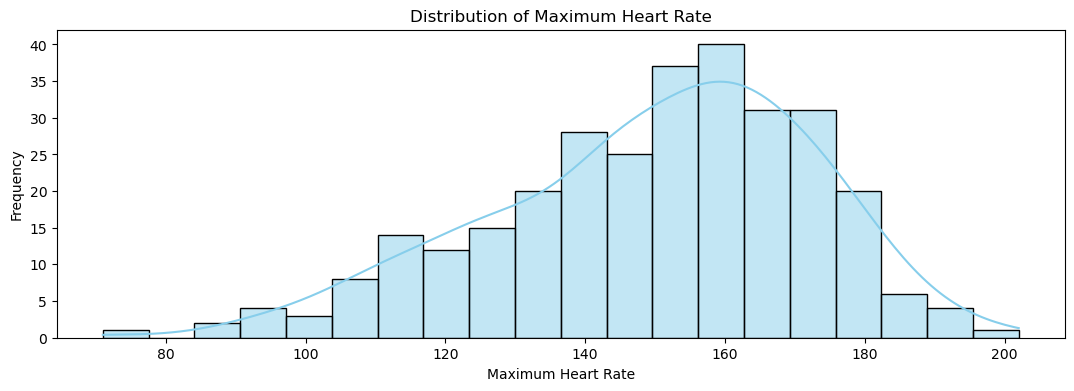

In [55]:
plt.figure(figsize=(13,4))
sns.histplot(heart['Maximum_Heart_Rate'], bins=20, kde=True, color='skyblue')
plt.title('Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [62]:
#Looking at outliers:
heart_low_hr = heart[heart['Maximum_Heart_Rate'] <= 90]

# Display the filtered entries
print(heart_low_hr)


     Age  Sex  Chest_Pain  Resting_Pressure  Cholesterol  Fasting_Blood_Sugar  \
243   57    1           0               152          274                    0   
272   67    1           0               120          237                    0   
297   59    1           0               164          176                    1   

     Resting_Ecg_Results  Maximum_Heart_Rate  Exercise_Induced_Angina  \
243                    1                  88                        1   
272                    1                  71                        0   
297                    0                  90                        0   

     Old_Peak  Slope  Major_Vessels  Thallium_Rate  Target  Num_Symptoms  
243       1.2      1              1              3       0            13  
272       1.0      1              0              2       0            13  
297       1.0      1              2              1       0            13  


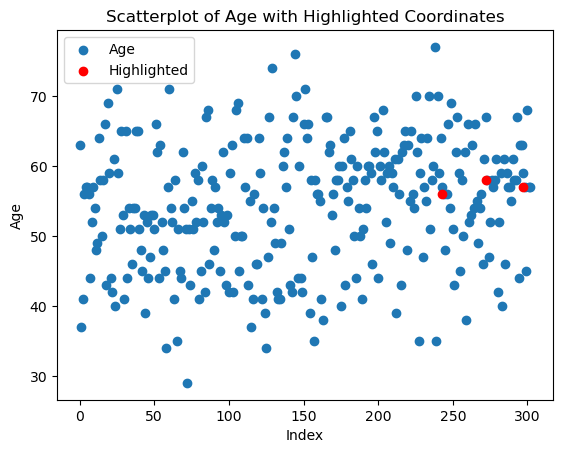

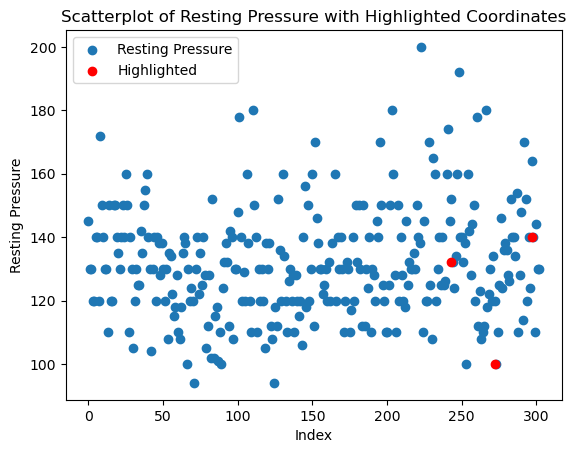

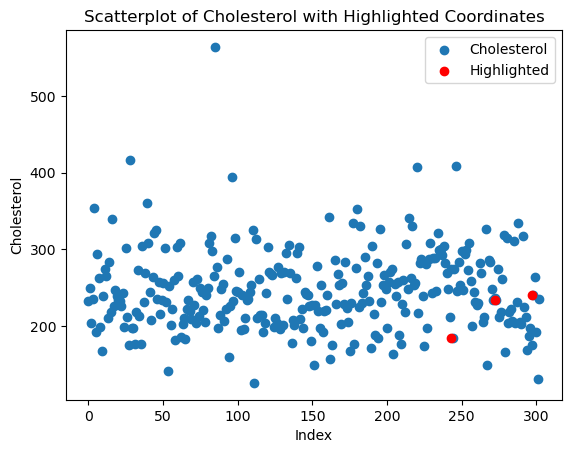

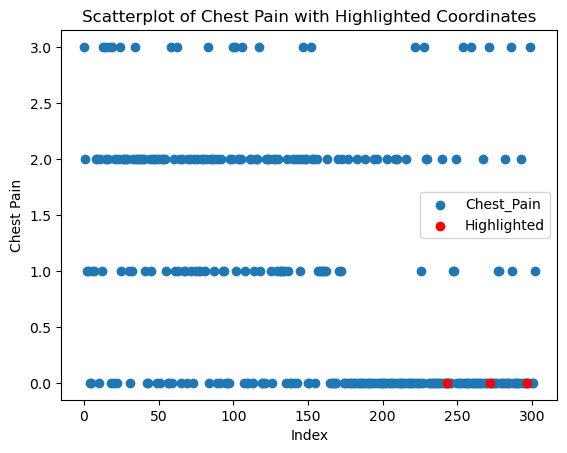

In [67]:
highlight_indices = [243, 272, 297]
highlight_data = heart.iloc[highlight_indices]

# Plot Age
plt.scatter(heart.index, heart['Age'], label='Age')
plt.scatter(highlight_indices, highlight_data['Age'], color='red', label='Highlighted')
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Scatterplot of Age with Highlighted Coordinates')
plt.legend()
plt.show()

# Plot Resting Pressure
plt.scatter(heart.index, heart['Resting_Pressure'], label='Resting Pressure')
plt.scatter(highlight_indices, highlight_data['Resting_Pressure'], color='red', label='Highlighted')
plt.xlabel('Index')
plt.ylabel('Resting Pressure')
plt.title('Scatterplot of Resting Pressure with Highlighted Coordinates')
plt.legend()
plt.show()

# Plot Cholesterol
plt.scatter(heart.index, heart['Cholesterol'], label='Cholesterol')
plt.scatter(highlight_indices, highlight_data['Cholesterol'], color='red', label='Highlighted')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.title('Scatterplot of Cholesterol with Highlighted Coordinates')
plt.legend()
plt.show()

# Plot Chest Pain
plt.scatter(heart.index, heart['Chest_Pain'], label='Chest_Pain')
plt.scatter(highlight_indices, highlight_data['Chest_Pain'], color='red', label='Highlighted')
plt.xlabel('Index')
plt.ylabel('Chest Pain')
plt.title('Scatterplot of Chest Pain with Highlighted Coordinates')
plt.legend()
plt.show()


# Correlations

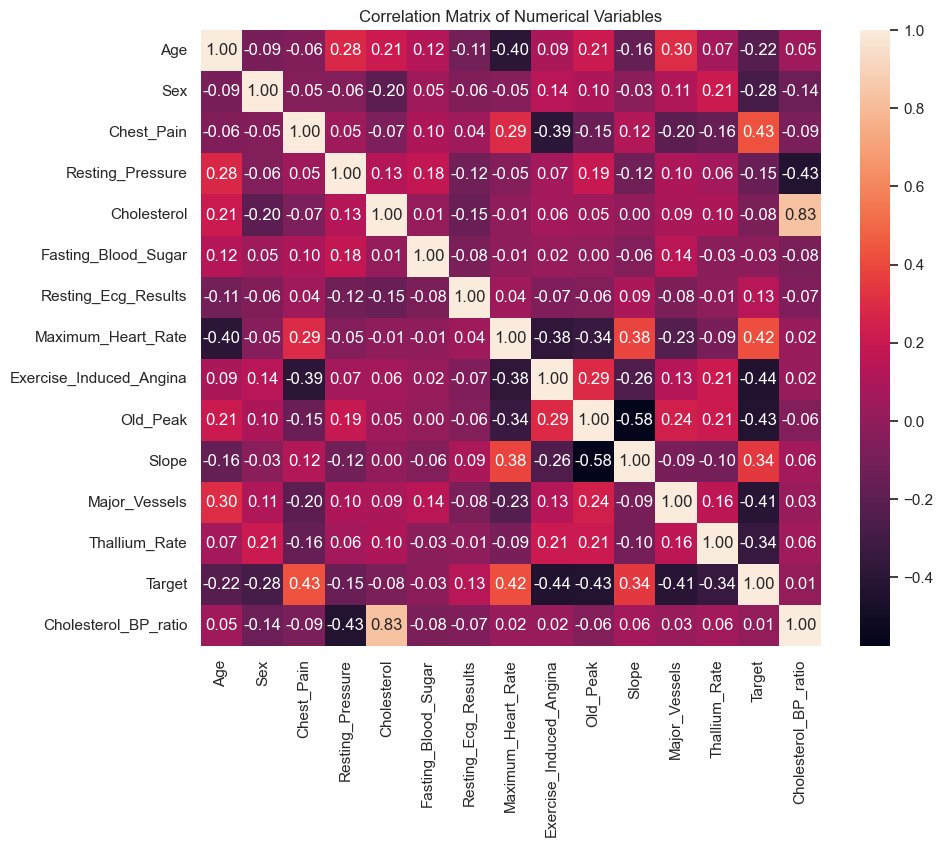

In [160]:
correlation_matrix = heart.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Looking At Data Considered Important 

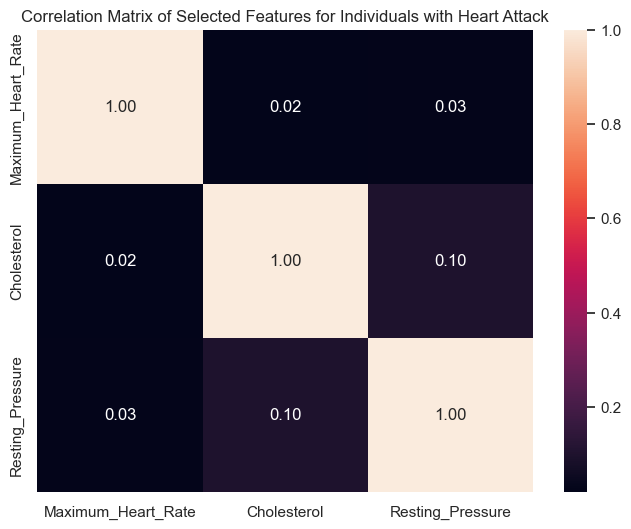

In [157]:
selected_features = ['Maximum_Heart_Rate', 'Cholesterol', 'Resting_Pressure']

# Filter data for individuals who had a heart attack and select specific features
heart_attack_data_selected = heart_attack_data[selected_features]

# Calculate the correlation matrix
correlation_matrix = heart_attack_data_selected.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Selected Features for Individuals with Heart Attack')
plt.show()


<Figure size 1000x800 with 0 Axes>

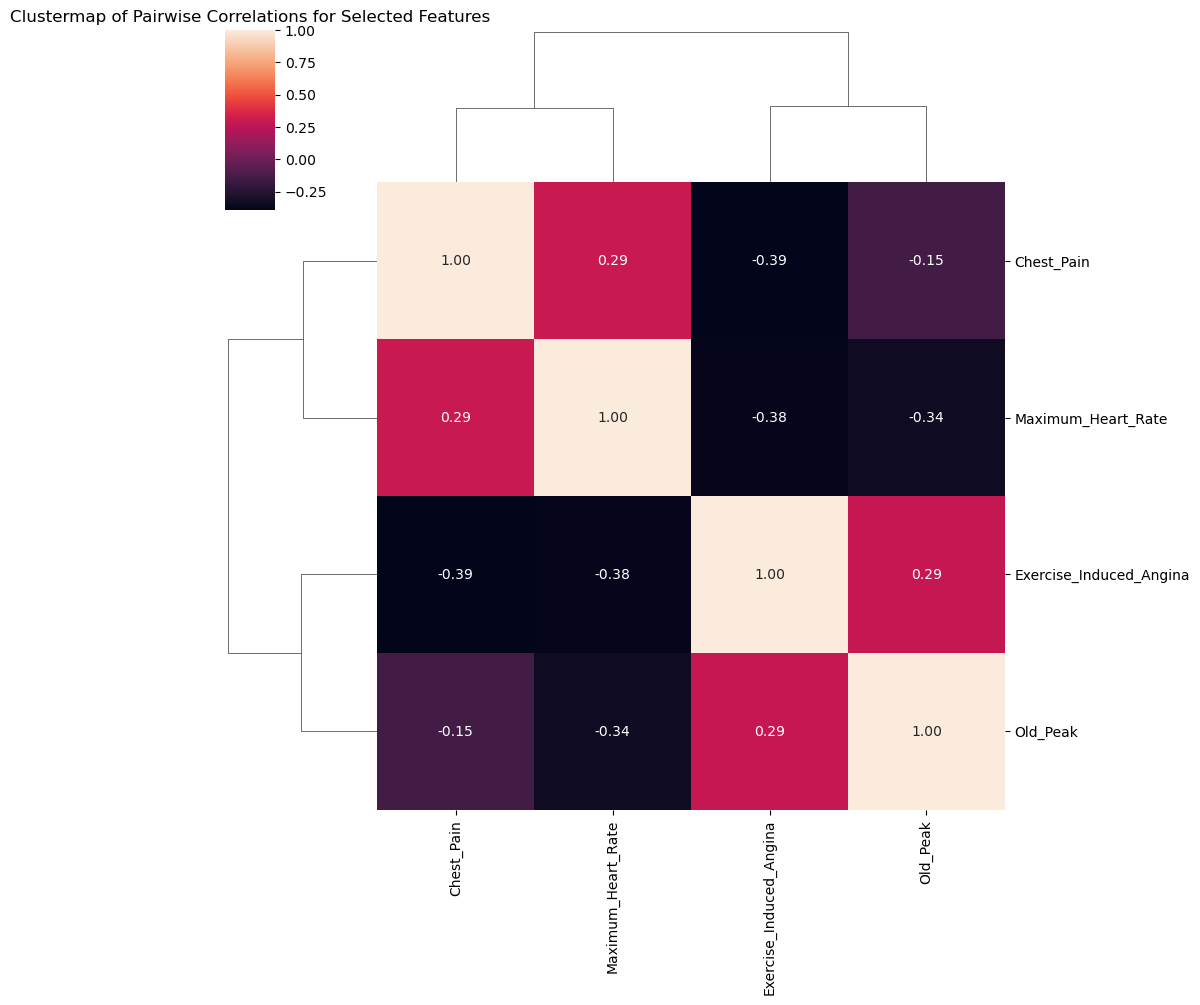

In [117]:
# Select the four main features that had an impact on the target value
selected_features = ['Exercise_Induced_Angina', 'Chest_Pain', 'Maximum_Heart_Rate', 'Old_Peak']

# Subset the correlation matrix
selected_corr_matrix = correlation_matrix.loc[selected_features, selected_features]

# Create a clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(selected_corr_matrix, annot=True, fmt=".2f")
plt.title('Clustermap of Pairwise Correlations for Selected Features')
plt.show()

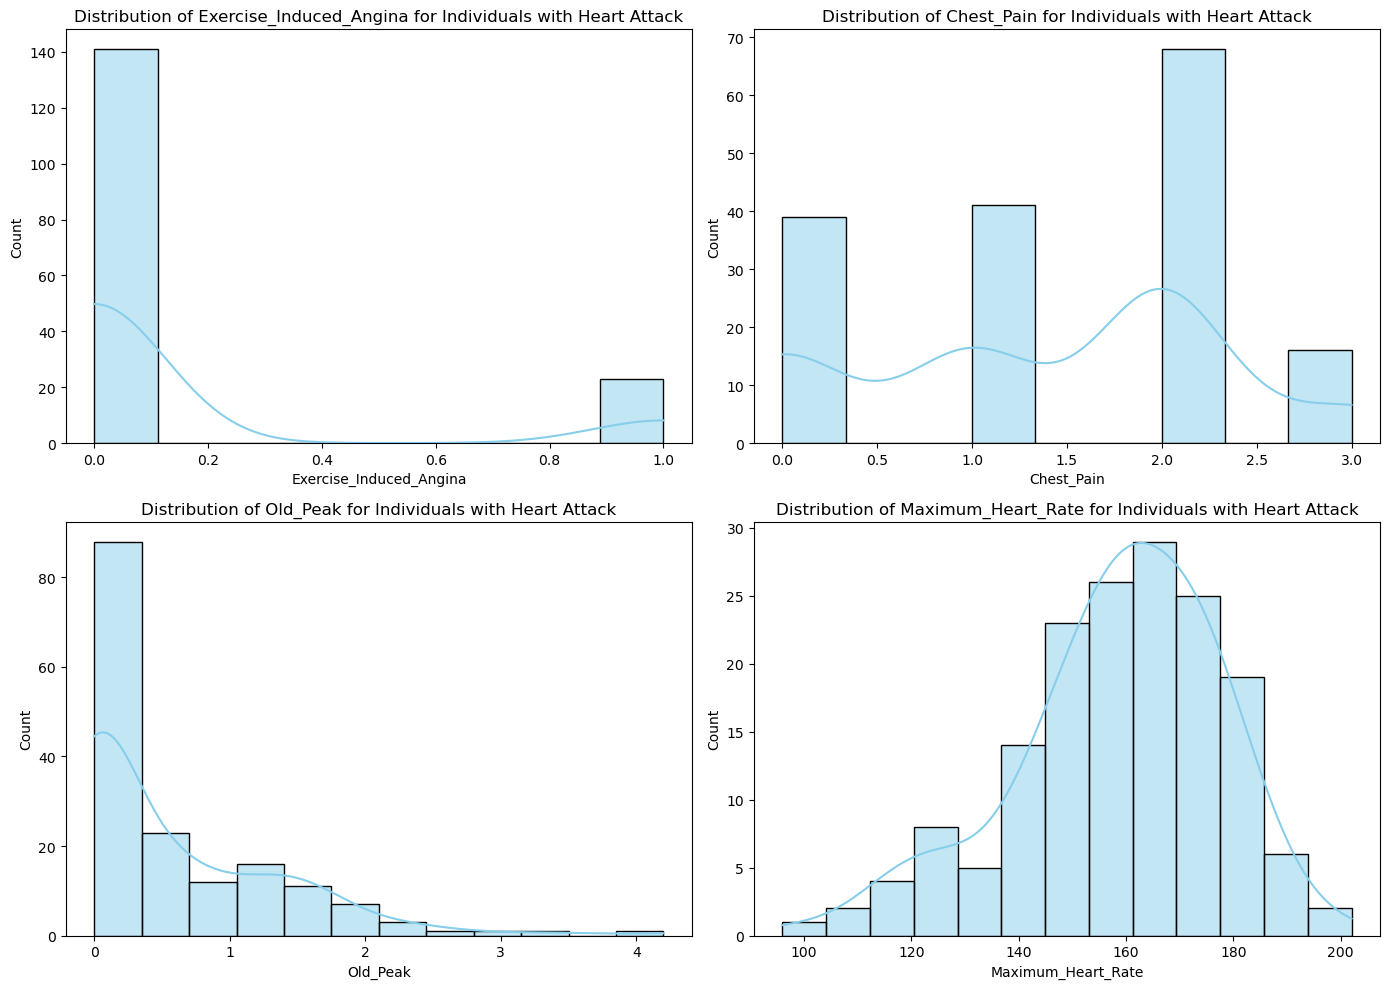

In [106]:
# Calculate correlations with the target variable
correlation_with_target = correlation_matrix['Target'].abs().sort_values(ascending=False)

# Select the four most important features (excluding the target variable)
important_features = correlation_with_target[1:5].index

# Filter data for individuals who had a heart attack
heart_attack_data = heart[heart['Target'] == 1]

# Plot the values of the four most important features for those who had a heart attack
plt.figure(figsize=(14, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(heart_attack_data[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature} for Individuals with Heart Attack')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Observations

There are definitely some inconsistencies in this data, causing it to differ from other similar statistical studies performed by researchers

*People age 65 and older are much more likely than younger people to suffer a heart attack, to have a stroke, or to develop coronary heart disease (commonly called heart disease) and heart failure* (https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=People%20age%2065%20and%20older,heart%20disease)

While the dataset covers various age ranges, it fails to adequately distinguish critical features or characteristics related to cardiovascular health. This lack of distinction may lead to inconsistencies in the data and hinder the accuracy of any predictive or analytical models developed from it.

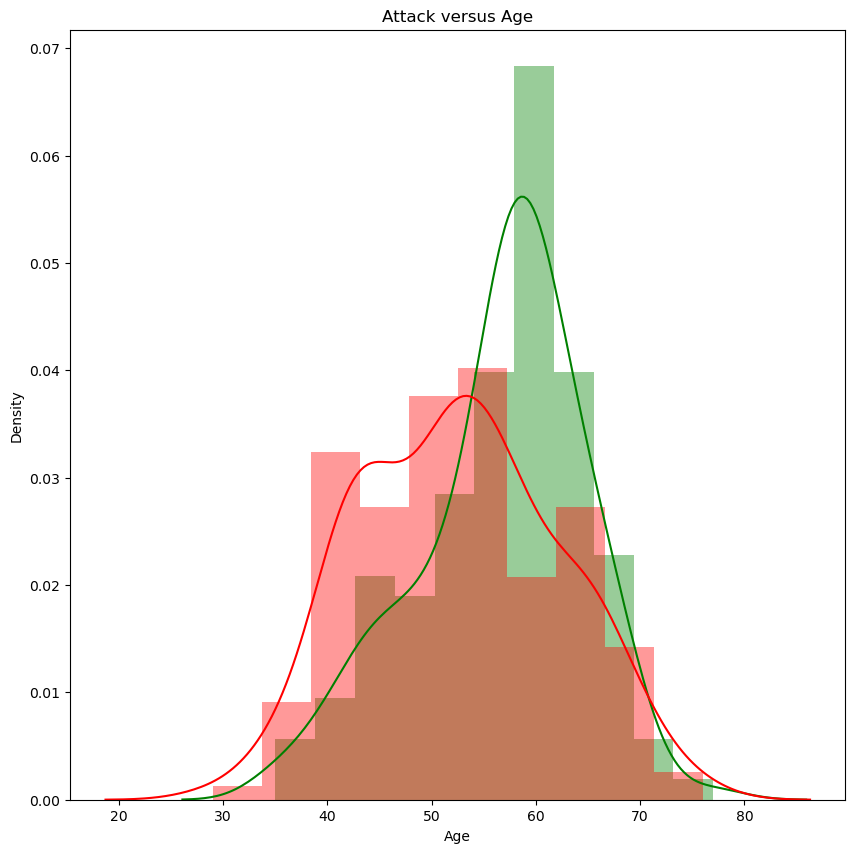

In [111]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['Target'] == 0]["Age"], color='green',kde=True,) 
sns.distplot(heart[heart['Target'] == 1]["Age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

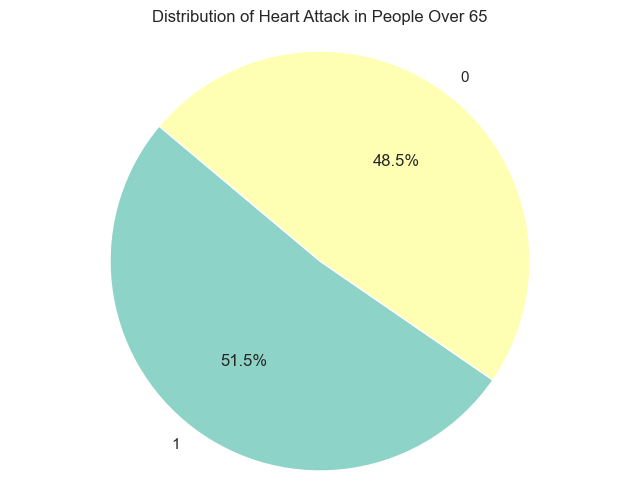

In [155]:
# Filter the dataset to include only people over 65
over_65 = heart[heart['Age'] > 65]

# Count the number of people with and without a heart attack
heart_attack_counts = over_65['Target'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors  # You can choose a colormap of your preference
plt.pie(heart_attack_counts, labels=heart_attack_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Set a title
plt.title("Distribution of Heart Attack in People Over 65")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### Looking At Features That Have Been Established As Important By Other Studies 

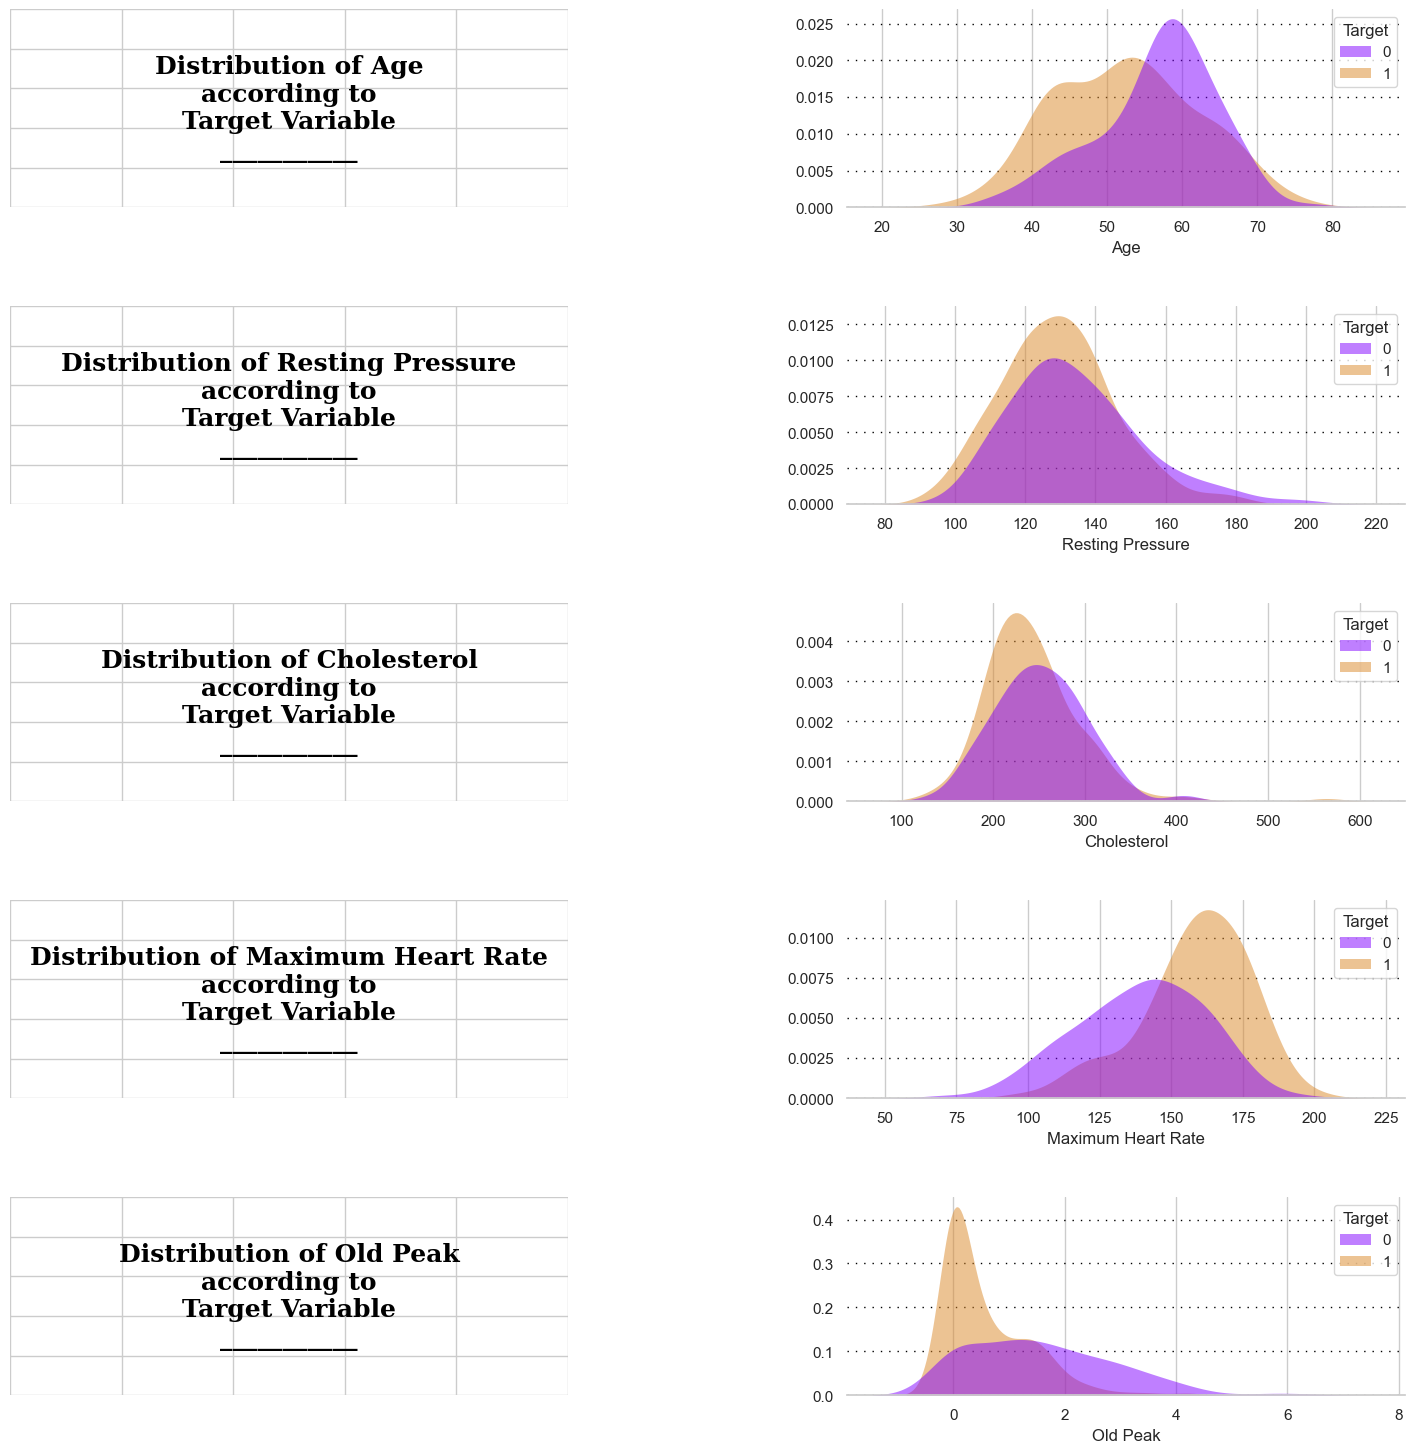

In [158]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])


ax0.text(0.5,0.5,"Distribution of Age\naccording to\nTarget Variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=heart, x='Age',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("Age")
ax1.set_ylabel("")

ax2.text(0.5,0.5,"Distribution of Resting Pressure\naccording to\nTarget Variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)


ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=heart, x='Resting_Pressure',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("Resting Pressure")
ax3.set_ylabel("")


ax4.text(0.5,0.5,"Distribution of Cholesterol\naccording to\nTarget Variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=heart, x='Cholesterol',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("Cholesterol")
ax5.set_ylabel("")

ax6.text(0.5,0.5,"Distribution of Maximum Heart Rate\naccording to\nTarget Variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)


ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=heart, x='Maximum_Heart_Rate',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("Maximum Heart Rate")
ax7.set_ylabel("")


ax8.text(0.5,0.5,"Distribution of Old Peak\naccording to\nTarget Variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)


ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=heart, x='Old_Peak',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("Old Peak")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)


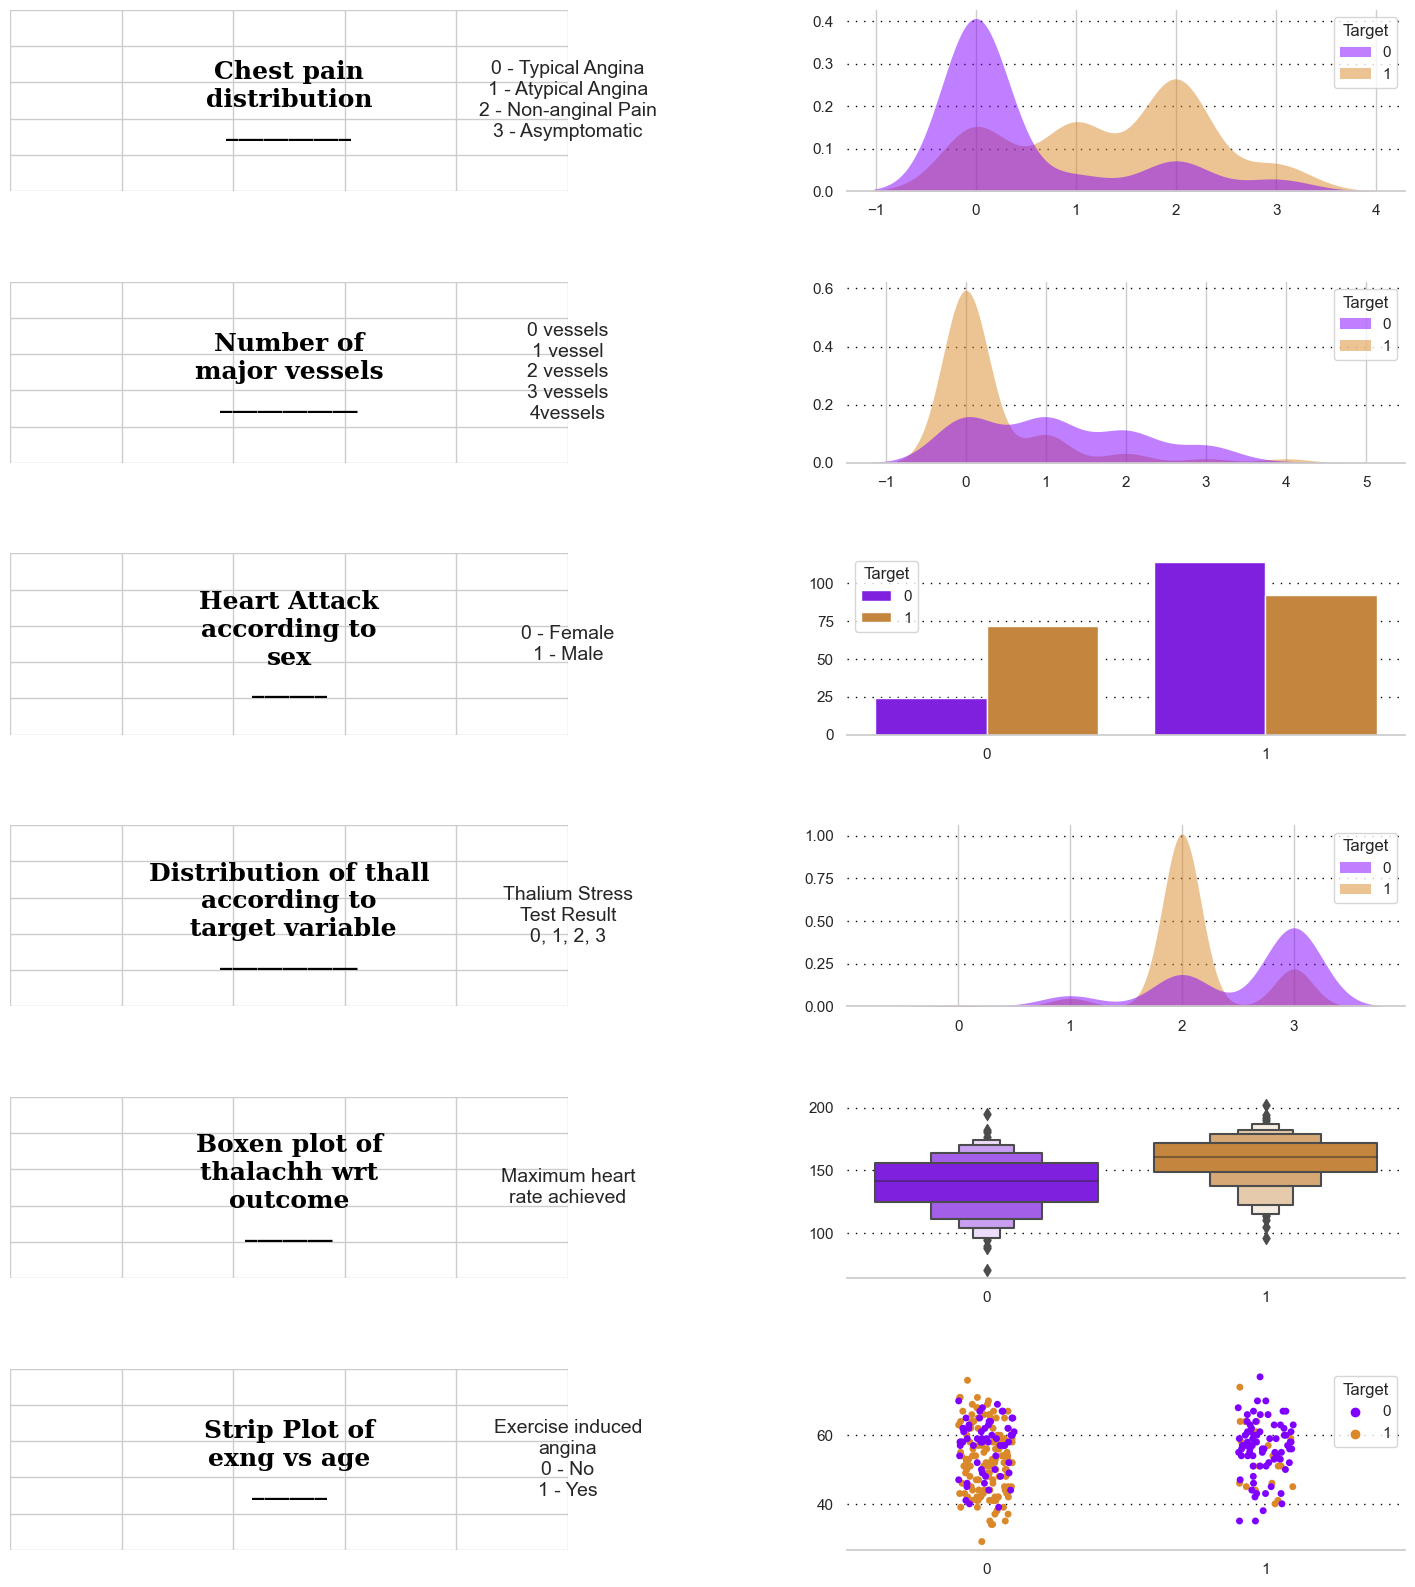

In [159]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])



# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )


ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=heart, x='Chest_Pain',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")


ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)


ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=heart, x='Major_Vessels',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")


ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)


ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=heart,x='Sex',palette=["#8000ff","#da8829"], hue='Target')
ax5.set_xlabel("")
ax5.set_ylabel("")


ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)


ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=heart, x='Thallium_Rate',hue="Target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")


ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)


ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=heart,x='Target',y='Maximum_Heart_Rate',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")


ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)



ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=heart,x='Exercise_Induced_Angina',y='Age',hue='Target',palette=["#8000ff","#da8829"])
ax11.set_xlabel("")
ax11.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)


# Conclusions From EDA

There are no NaN values in the data.
There are certain outliers in all the continuous features.
The data consists a somewhat uneven distribution of males vs. females
There is no apparent strong correlations according to the heatmap

The scatterplot heatmap matrix suggests that there might be some correlation between Target and Old Peak, Chest Pain, Maximum Heart Rate, and Excercise Induced Angina.
It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
There are some people in here that have little symptoms but still had a heart attack
According to the distribution plot of OldPeak with Target, people with lower pevious peak achieved have higher chances of heart attack.


People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
People with 0 major vessels have high chance of heart attack (we also see that this however is correlated with age)
People with sex = 1 have higher chance of heart attack.
People with Thallium rate = 2 have much higher chance of heart attack.
People with no exercise induced angina have higher chance of heart attack.


# Feature Engineering

Adding some features based on our observations:

The total cholesterol to HDL cholesterol ratio is way to calculate cardiovascular risk. A high total cholesterol to HDL ratio indicates a higher risk for heart disease. It can be measured by dividing the total cholesterol by the HDL level. A desirable ratio is 5:1, and an optimal ratio is 3.5:1. (https://www.medicalnewstoday.com/articles/321484#:~:text=The%20total%20cholesterol%20to%20HDL,optimal%20ratio%20is%203.5%3A1.)


In [99]:
heart['Cholesterol_BP_ratio'] = heart['Cholesterol'] / heart['Resting_Pressure']

# Display the DataFrame with the new ratio column
print(heart[['Cholesterol', 'Resting_Pressure', 'Cholesterol_BP_ratio']])

     Cholesterol  Resting_Pressure  Cholesterol_BP_ratio
0            233               145              1.606897
1            250               130              1.923077
2            204               130              1.569231
3            236               120              1.966667
4            354               120              2.950000
..           ...               ...                   ...
298          241               140              1.721429
299          264               110              2.400000
300          193               144              1.340278
301          131               130              1.007692
302          236               130              1.815385

[302 rows x 3 columns]


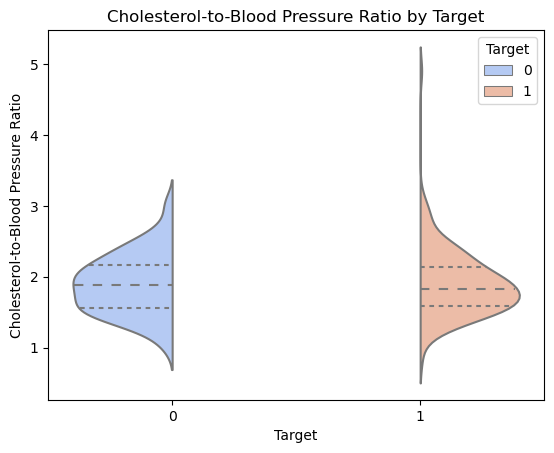

In [7]:
sns.violinplot(data=heart, x='Target', y='Cholesterol_BP_ratio', hue='Target', palette='coolwarm', split=True, inner="quartile")

# Add title and labels
plt.title('Cholesterol-to-Blood Pressure Ratio by Target')
plt.xlabel('Target')
plt.ylabel('Cholesterol-to-Blood Pressure Ratio')
plt.legend(title='Target', loc='upper right')

# Show plot
plt.show()

In [100]:
heart

Age  Sex  Chest_Pain  Resting_Pressure  Cholesterol  Fasting_Blood_Sugar  \
0     63    1           3               145          233                    1   
1     37    1           2               130          250                    0   
2     41    0           1               130          204                    0   
3     56    1           1               120          236                    0   
4     57    0           0               120          354                    0   
..   ...  ...         ...               ...          ...                  ...   
298   57    0           0               140          241                    0   
299   45    1           3               110          264                    0   
300   68    1           0               144          193                    1   
301   57    1           0               130          131                    0   
302   57    0           1               130          236                    0   

     Resting_Ecg_Results  Maximum_Heart_Rate  Exercise_Induced_Angina  \
0                      0                 150                        0   
1                      1                 187                        0   
2                      0                 172                        0   
3                      1                 178                        0   
4                      1                 163                        1   
..                   ...                 ...                      ...   
298                    1                 123                        1   
299                    1                 132                        0   
300                    1                 141                        0   
301                    1                 115                        1   
302                    0                 174                        0   

     Old_Peak  Slope  Major_Vessels  Thallium_Rate  Target  \
0         2.3      0              0              1       1   
1         3.5      0              0              2       1   
2         1.4      2              0              2       1   
3         0.8      2              0              2       1   
4         0.6      2              0              2       1   
..        ...    ...            ...            ...     ...   
298       0.2      1              0              3       0   
299       1.2      1              0              3       0   
300       3.4      1              2              3       0   
301       1.2      1              1              3       0   
302       0.0      1              1              2       0   

     Cholesterol_BP_ratio  
0                1.606897  
1                1.923077  
2                1.569231  
3                1.966667  
4                2.950000  
..                    ...  
298              1.721429  
299              2.400000  
300              1.340278  
301              1.007692  
302              1.815385  

[302 rows x 15 columns]

# Data Preprocessing

Note: ALWAYS make a copy of the dataset to reverse any mistakes & check the shape after train_test_split

### Train-Test Split

In [101]:
# creating a copy of df
df1 = heart.copy()

# define the columns to be encoded and scaled
cat_cols = ['Sex', 'Exercise_Induced_Angina', 'Major_Vessels', 'Chest_Pain', 'Fasting_Blood_Sugar', 'Resting_Ecg_Results', 'Slope', 'Thallium_Rate']
con_cols = ["Age", "Resting_Pressure", "Cholesterol", "Maximum_Heart_Rate", "Old_Peak", "Cholesterol_BP_ratio"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)
print(df1)

# dropping the target column
X = df1.drop(['Target'], axis=1)
y = df1['Target']  # Selecting just the target column


     Age  Resting_Pressure  Cholesterol  Maximum_Heart_Rate  Old_Peak  Target  \
0     63               145          233                 150       2.3       1   
1     37               130          250                 187       3.5       1   
2     41               130          204                 172       1.4       1   
3     56               120          236                 178       0.8       1   
4     57               120          354                 163       0.6       1   
..   ...               ...          ...                 ...       ...     ...   
298   57               140          241                 123       0.2       0   
299   45               110          264                 132       1.2       0   
300   68               144          193                 141       3.4       0   
301   57               130          131                 115       1.2       0   
302   57               130          236                 174       0.0       0   

     Cholesterol_BP_ratio  

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 23) (241,)
Shape for testing data (61, 23) (61,)


In [65]:
x_test

array([[-0.07692308,  0.1       ,  1.82258065, ...,  0.        ,
        -1.        ,  1.        ],
       [ 0.61538462, -0.25      ,  1.11290323, ...,  0.        ,
        -1.        ,  1.        ],
       [ 0.07692308,  1.        , -1.83870968, ...,  0.        ,
        -1.        ,  1.        ],
       ...,
       [ 0.92307692,  0.7       , -0.75806452, ...,  0.        ,
        -1.        ,  1.        ],
       [ 0.30769231,  0.5       , -0.88709677, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92307692, -0.9       ,  0.80645161, ...,  0.        ,
         0.        ,  0.        ]])

### Scaling 

My reasonings for choosing RobustScaler:

RobustScaler is suitable for datasets with outliers, as it scales the data based on the interquartile range (IQR) and median, making it robust to extreme values

It subtracts the median from each feature and then scales them by the IQR. This approach ensures that the scaling is less influenced by outliers compared to other scaling techniques like StandardScaler or MinMaxScaler.

RobustScaler preserves the shape of the distribution of each feature, making it suitable for datasets where the distribution of features is not Gaussian or uniformly distributed


In [103]:
# instantiating the scaler
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)

[[-1.07692308 -0.5         0.88709677 ...  0.          0.
   0.        ]
 [ 0.92307692  2.5         0.5483871  ...  0.         -1.
   1.        ]
 [ 0.84615385 -0.25        0.22580645 ...  0.         -1.
   1.        ]
 ...
 [ 1.          1.5        -0.09677419 ...  0.          0.
   0.        ]
 [ 0.38461538  0.2        -0.09677419 ...  0.          0.
   0.        ]
 [ 0.53846154  0.5        -0.72580645 ...  0.          0.
   0.        ]]


# Testing Out Different Algos

In [104]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("Logistic Regression accuracy: ", accuracy_score(y_test, predicted) * 100, "%")

Logistic Regression accuracy:  90.1639344262295 %


In [255]:
random_forest = RandomForestClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()

# Train models
random_forest.fit(x_train, y_train)
gbm.fit(x_train, y_train)
svm.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Predictions
rf_pred = random_forest.predict(x_test)
gbm_pred = gbm.predict(x_test)
svm_pred = svm.predict(x_test)
knn_pred = knn.predict(x_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
gbm_accuracy = accuracy_score(y_test, gbm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Random Forest Accuracy:", rf_accuracy* 100, "%")
print("Gradient Boosting Accuracy:", gbm_accuracy* 100, "%")
print("SVM Accuracy:", svm_accuracy* 100, "%")
print("KNN Accuracy:", knn_accuracy* 100, "%")

Random Forest Accuracy: 85.24590163934425 %
Gradient Boosting Accuracy: 81.9672131147541 %
SVM Accuracy: 85.24590163934425 %
KNN Accuracy: 85.24590163934425 %


In [256]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Train XGBoost Classifier
xgb_model.fit(x_train, y_train)

# Predictions
xgb_pred = xgb_model.predict(x_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Classifier Accuracy:", xgb_accuracy*100, " %")

XGBoost Classifier Accuracy: 81.9672131147541  %


In [230]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifier
dt_model.fit(x_train, y_train)

# Predictions
dt_pred = dt_model.predict(x_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy*100, " %")

Decision Tree Classifier Accuracy: 70.49180327868852  %


### Trying Some Combinations

In [257]:
# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', model),
    ('svm', svm),
], voting='hard')

# Train the voting classifier
voting_classifier.fit(x_train, y_train)

# Predictions
vc_pred = voting_classifier.predict(x_test)

# Calculate accuracy
vc_accuracy = accuracy_score(y_test, vc_pred)
print("Voting Classifier Accuracy:", vc_accuracy)


Voting Classifier Accuracy: 0.8360655737704918


In [258]:
# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svm),
], voting='hard')

# Train the voting classifier
voting_classifier.fit(x_train, y_train)

# Predictions
vc_pred = voting_classifier.predict(x_test)

# Calculate accuracy
vc_accuracy = accuracy_score(y_test, vc_pred)
print("Voting Classifier Accuracy:", vc_accuracy)

Voting Classifier Accuracy: 0.8524590163934426


In [259]:
# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('xgb_model', xgb_model),
    ('svm', svm),
], voting='hard')

# Train the voting classifier
voting_classifier.fit(x_train, y_train)

# Predictions
vc_pred = voting_classifier.predict(x_test)

# Calculate accuracy
vc_accuracy = accuracy_score(y_test, vc_pred)
print("Voting Classifier Accuracy:", vc_accuracy)

Voting Classifier Accuracy: 0.8524590163934426


## Hyperparameter Tuning

This did turn out unsuccessful since our original Logistic Regression Model still outperforms

In [13]:
# Define hyperparameters for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']
}

# Initialize Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_lr.fit(x_train, y_train)

# Get best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Score for Logistic Regression:", best_score_lr)


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.8463435374149659


In [261]:
# Define hyperparameters for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf']
}

# Initialize SVM
svm_model = SVC(random_state=42)

# Create GridSearchCV object for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_svm.fit(x_train, y_train)

# Get best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)


Best Parameters for SVM: {'C': 100, 'kernel': 'linear'}
Best Score for SVM: 0.8465986394557824


In [238]:
# Define hyperparameters for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN
knn_model = KNeighborsClassifier()

# Create GridSearchCV object for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_knn.fit(x_train, y_train)

# Get best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters for KNN:", best_params_knn)
print("Best Score for KNN:", best_score_knn)


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score for KNN: 0.8090136054421769


# Logistic Regression

Trying to understand, why does it work so well?

In [14]:
# Train Logistic Regression
model.fit(x_train, y_train)

# Predictions
predicted = model.predict(x_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted))

# F1 Score
f1 = f1_score(y_test, predicted)
print("\nF1 Score:", f1)

# Recall Score
recall = recall_score(y_test, predicted)
print("Recall Score:", recall)

# Coefficient Matrix
coefficients = pd.DataFrame(data=model.coef_[0], index=X.columns, columns=['Coefficient'])
print("\nCoefficient Matrix:")
print(coefficients)


Confusion Matrix:
[[27  2]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


F1 Score: 0.9032258064516129
Recall Score: 0.875

Coefficient Matrix:
                           Coefficient
Age                           0.170631
Resting_Pressure             -0.343928
Cholesterol                  -0.325526
Maximum_Heart_Rate            0.499811
Old_Peak                     -0.587800
Cholesterol_BP_ratio          0.212613
Sex_1                        -1.192717
Exercise_Induced_Angina_1    -0.819580
Major_Vessels_1              -1.596947
Major_Vessels_2              -1.827203
Major_Vessels_3              -0.978677
Major_Vessels_4               0.327325
Chest_Pain_1                  0.49

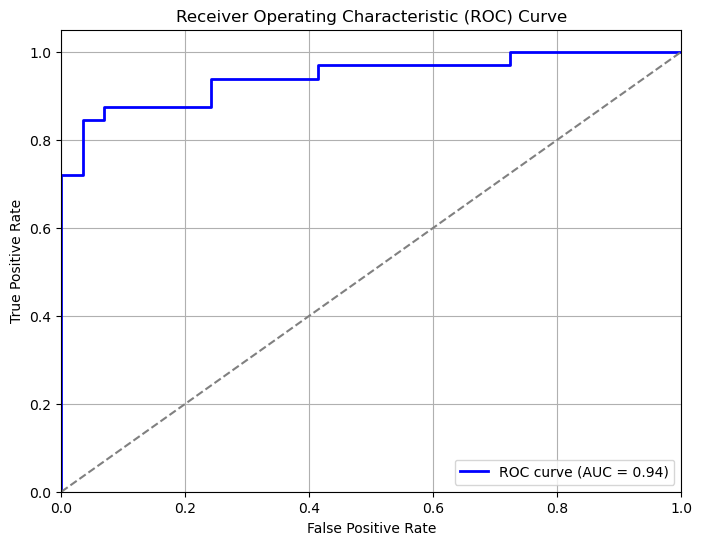

In [15]:
# Calculate probabilities for the positive class
probs = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

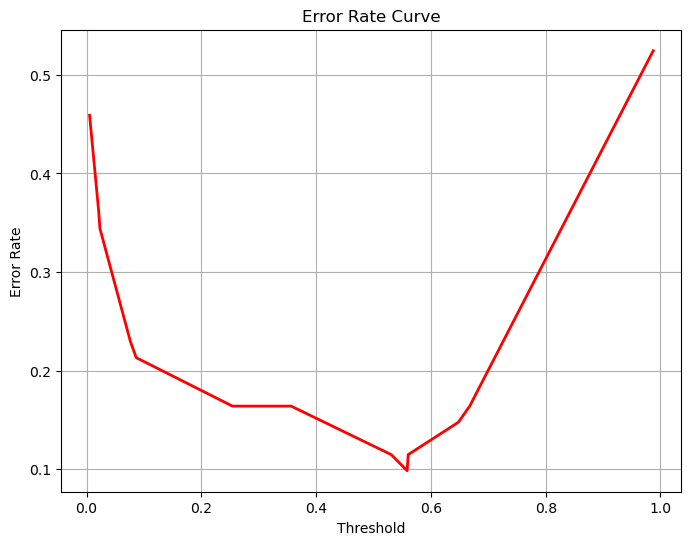

In [16]:
error_rate = []
for threshold in thresholds:
    preds = np.where(probs > threshold, 1, 0)
    error_rate.append(np.mean(preds != y_test))

# Plot error rate curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, error_rate, color='red', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rate Curve')
plt.grid(True)
plt.show()


# Conclusion

Overall, most models seem to be perfomring decently however Logistic Regression is the best with an accuracy of 90%

But what's next? What's the point of making amazing models that are not understandable beyond technical professionals?

Step 1: Exporting the model (I am going to use Joblib, but pickle is another popular choice for these kinds of ML models)
Step 2: API development
Step 3: Integration throuhg app or webapp

In [105]:
import joblib

# Serialize the model to a file
joblib.dump(model, 'heart_attack_model.joblib')

# Load the model from the file
loaded_model = joblib.load('heart_attack_model.joblib')